In [9]:
# Importar a base
import kagglehub
path = kagglehub.dataset_download("rabieelkharoua/predict-conversion-in-digital-marketing-dataset")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'predict-conversion-in-digital-marketing-dataset' dataset.
Path to dataset files: /kaggle/input/predict-conversion-in-digital-marketing-dataset


In [10]:
import os
print("Arquivos disponíveis:")
for f in os.listdir(path):
    print(f)


Arquivos disponíveis:
digital_marketing_campaign_dataset.csv


In [39]:
#Dimensão da base e as variáveis
import pandas as pd
df = pd.read_csv(path + "/digital_marketing_campaign_dataset.csv")
print("Dimensão da base:", df.shape)
print("\nPrimeiras linhas:")
print(df.head())


Dimensão da base: (8000, 20)

Primeiras linhas:
   CustomerID  Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0        8000   56  Female  136912    Social Media    Awareness  6497.870068   
1        8001   69    Male   41760           Email    Retention  3898.668606   
2        8002   46  Female   88456             PPC    Awareness  1546.429596   
3        8003   32  Female   44085             PPC   Conversion   539.525936   
4        8004   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4          0.252851        0.109940              0       2.046847 

In [12]:
# Classificação das colunas
print("\nTipos das colunas:\n")
print(df.dtypes)



Tipos das colunas:

CustomerID               int64
Age                      int64
Gender                  object
Income                   int64
CampaignChannel         object
CampaignType            object
AdSpend                float64
ClickThroughRate       float64
ConversionRate         float64
WebsiteVisits            int64
PagesPerVisit          float64
TimeOnSite             float64
SocialShares             int64
EmailOpens               int64
EmailClicks              int64
PreviousPurchases        int64
LoyaltyPoints            int64
AdvertisingPlatform     object
AdvertisingTool         object
Conversion               int64
dtype: object


In [13]:
print("\nValores faltantes por coluna:")
print(df.isna().sum())
print("\nDuplicatas:", df.duplicated().sum())



Valores faltantes por coluna:
CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64

Duplicatas: 0


In [14]:
print("\nDistribuição do target:")
print(df["Conversion"].value_counts())
print(df["Conversion"].value_counts(normalize=True))



Distribuição do target:
Conversion
1    7012
0     988
Name: count, dtype: int64
Conversion
1    0.8765
0    0.1235
Name: proportion, dtype: float64


In [15]:
cols_drop = ["CustomerID", "AdvertisingPlatform", "AdvertisingTool"]
df_clean = df.drop(columns=cols_drop)
print("Colunas restantes:", df_clean.columns.tolist())
print("\nDimensão após drop:", df_clean.shape)

Colunas restantes: ['Age', 'Gender', 'Income', 'CampaignChannel', 'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints', 'Conversion']

Dimensão após drop: (8000, 17)


In [16]:
# definindo target
target = "Conversion"
# separando colunas numéricas e categóricas
num_cols = [c for c in df_clean.columns if df_clean[c].dtype != "object" and c != target]
cat_cols = [c for c in df_clean.columns if df_clean[c].dtype == "object"]
print("Numéricas:", num_cols)
print("Categóricas:", cat_cols)
# separando X e y
X = df_clean.drop(columns=[target])
y = df_clean[target]

print("\nShape X:", X.shape)
print("Shape y:", y.shape)


Numéricas: ['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints']
Categóricas: ['Gender', 'CampaignChannel', 'CampaignType']

Shape X: (8000, 16)
Shape y: (8000,)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
# divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Treino:", X_train.shape, y_train.shape)
print("Teste:", X_test.shape, y_test.shape)

# pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)
print("\nPré-processador configurado.")


Treino: (6400, 16) (6400,)
Teste: (1600, 16) (1600,)

Pré-processador configurado.


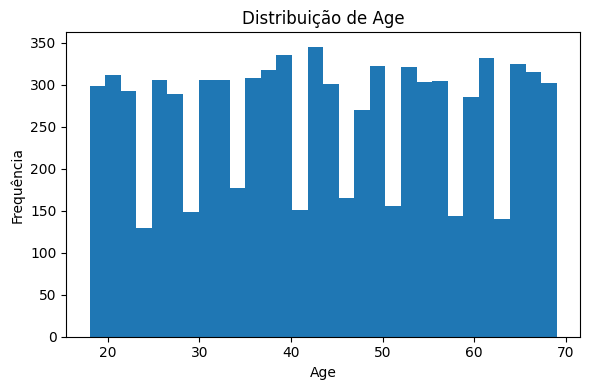

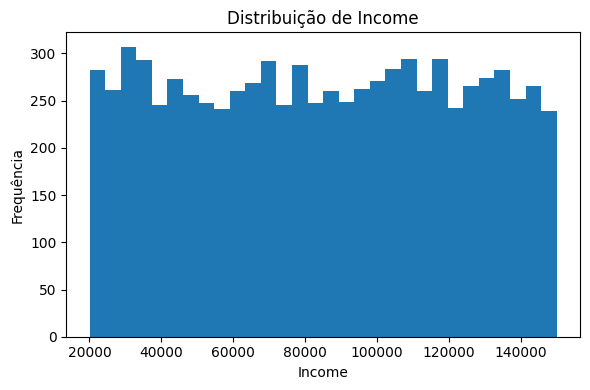

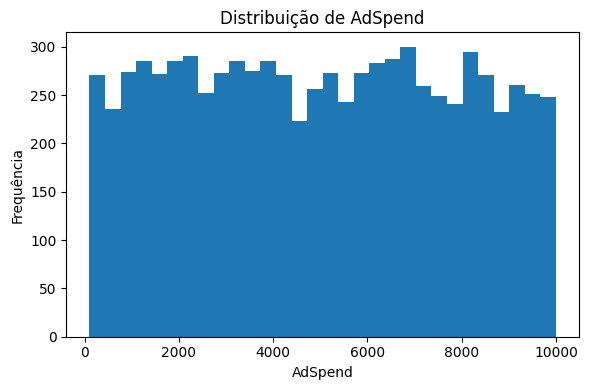

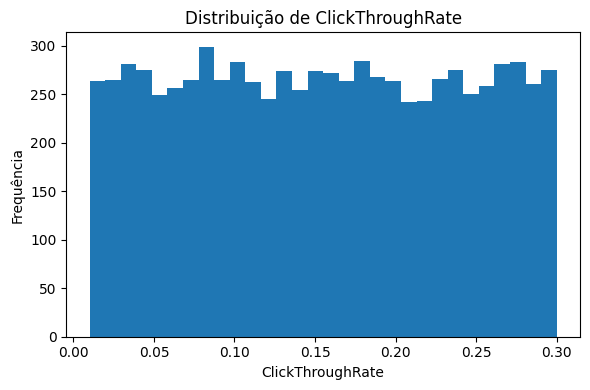

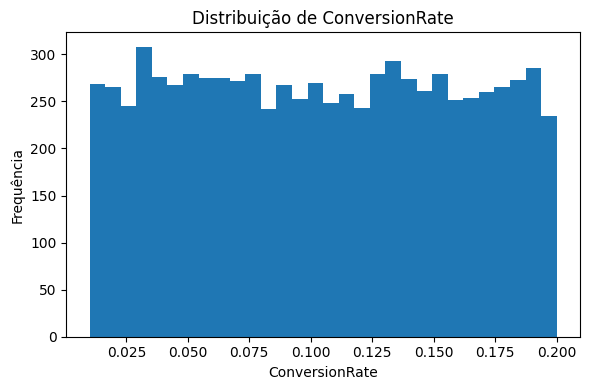

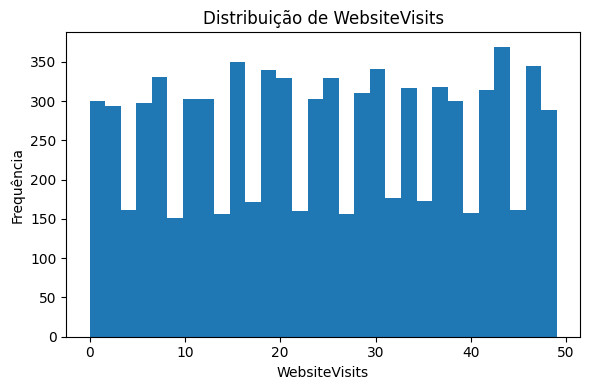

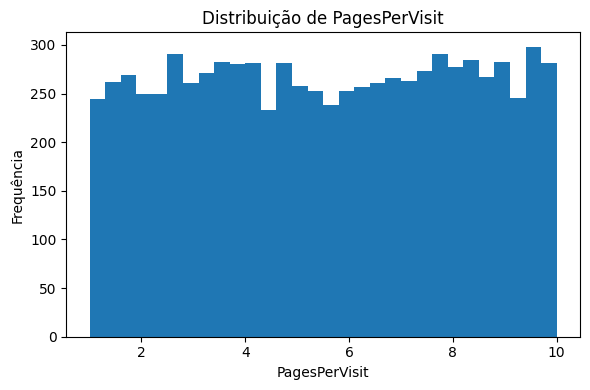

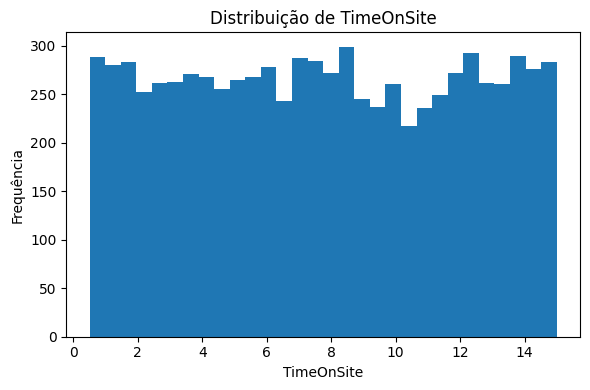

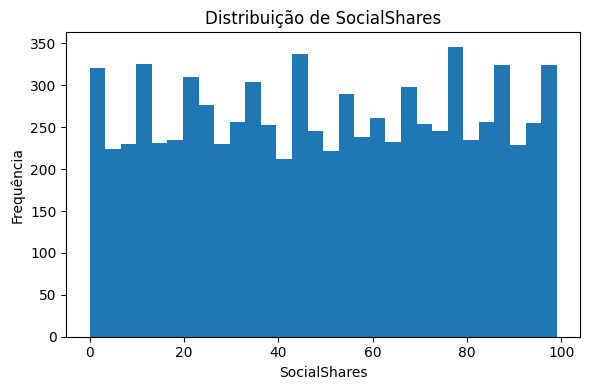

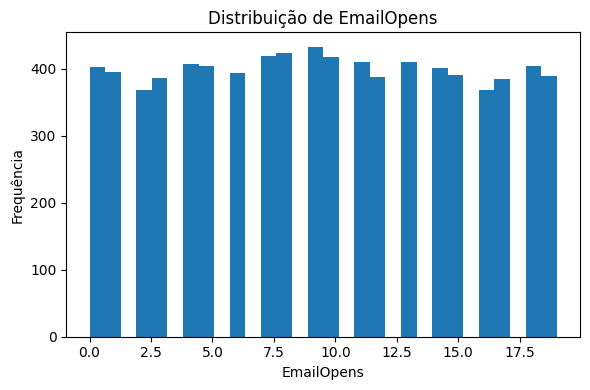

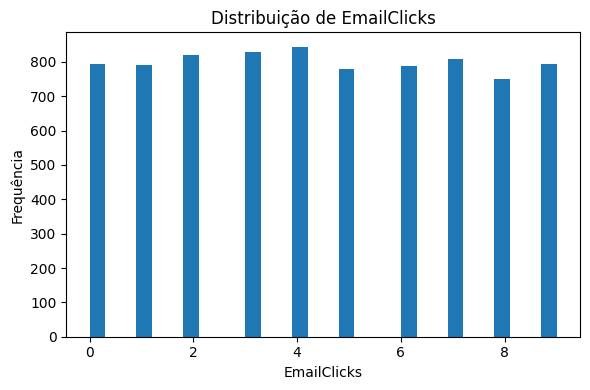

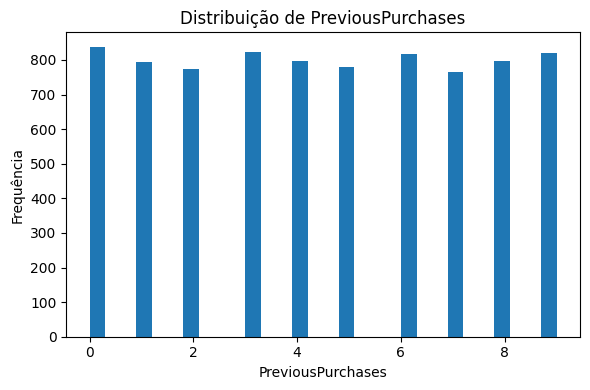

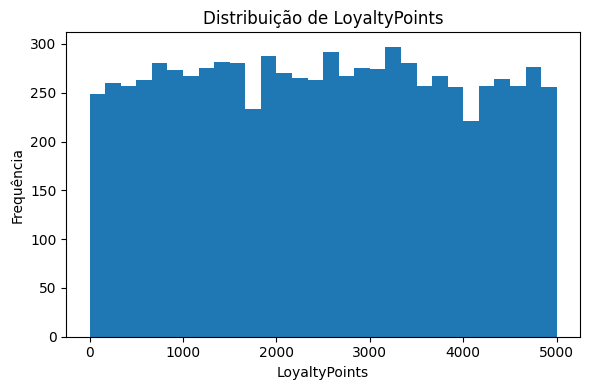

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Selecionar variáveis numéricas relevantes
num_cols = [
    "Age", "Income", "AdSpend", "ClickThroughRate", "ConversionRate",
    "WebsiteVisits", "PagesPerVisit", "TimeOnSite", "SocialShares",
    "EmailOpens", "EmailClicks", "PreviousPurchases", "LoyaltyPoints"
]

# Loop para gerar um histograma por figura
for col in num_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=30)
    plt.title(f"Distribuição de {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.tight_layout()
    plt.show()


In [19]:
# Seleciona apenas as variáveis numéricas
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
df_num = df[num_cols]
# Estatísticas básicas
stats = df_num.describe().T
# Adiciona mediana
stats["median"] = df_num.median()
# Adiciona moda (pega o primeiro valor da moda)
modes = df_num.mode().iloc[0]
stats["mode"] = modes
stats


count          mean           std           min  \
CustomerID         8000.0  11999.500000   2309.545410   8000.000000   
Age                8000.0     43.625500     14.902785     18.000000   
Income             8000.0  84664.196750  37580.387945  20014.000000   
AdSpend            8000.0   5000.944830   2838.038153    100.054813   
ClickThroughRate   8000.0      0.154829      0.084007      0.010005   
ConversionRate     8000.0      0.104389      0.054878      0.010018   
WebsiteVisits      8000.0     24.751625     14.312269      0.000000   
PagesPerVisit      8000.0      5.549299      2.607358      1.000428   
TimeOnSite         8000.0      7.727718      4.228218      0.501669   
SocialShares       8000.0     49.799750     28.901165      0.000000   
EmailOpens         8000.0      9.476875      5.711111      0.000000   
EmailClicks        8000.0      4.467375      2.856564      0.000000   
PreviousPurchases  8000.0      4.485500      2.888093      0.000000   
LoyaltyPoints      8000.0   2490.268500   1429.527162      0.000000   
Conversion         8000.0      0.876500      0.329031      0.000000   

                            25%           50%            75%            max  \
CustomerID          9999.750000  11999.500000   13999.250000   15999.000000   
Age                   31.000000     43.000000      56.000000      69.000000   
Income             51744.500000  84926.500000  116815.750000  149986.000000   
AdSpend             2523.221165   5013.440044    7407.989369    9997.914781   
ClickThroughRate       0.082635      0.154505       0.228207       0.299968   
ConversionRate         0.056410      0.104046       0.152077       0.199995   
WebsiteVisits         13.000000     25.000000      37.000000      49.000000   
PagesPerVisit          3.302479      5.534257       7.835756       9.999055   
TimeOnSite             4.068340      7.682956      11.481468      14.995311   
SocialShares          25.000000     50.000000      75.000000      99.000000   
EmailOpens             5.000000      9.000000      14.000000      19.000000   
EmailClicks            2.000000      4.000000       7.000000       9.000000   
PreviousPurchases      2.000000      4.000000       7.000000       9.000000   
LoyaltyPoints       1254.750000   2497.000000    3702.250000    4999.000000   
Conversion             1.000000      1.000000       1.000000       1.000000   

                         median          mode  
CustomerID         11999.500000   8000.000000  
Age                   43.000000     64.000000  
Income             84926.500000  50268.000000  
AdSpend             5013.440044    100.054813  
ClickThroughRate       0.154505      0.010005  
ConversionRate         0.104046      0.010018  
WebsiteVisits         25.000000     25.000000  
PagesPerVisit          5.534257      1.000428  
TimeOnSite             7.682956      0.501669  
SocialShares          50.000000     61.000000  
EmailOpens             9.000000      9.000000  
EmailClicks            4.000000      4.000000  
PreviousPurchases      4.000000      0.000000  
LoyaltyPoints       2497.000000   1392.000000  
Conversion             1.000000      1.000000

In [20]:
# Seleciona as variáveis categóricas
cat_cols = df.select_dtypes(include=["object"]).columns
df_cat = df[cat_cols]

# Moda para cada variável categórica
cat_summary = pd.DataFrame({
    "unique": df_cat.nunique(),
    "mode": df_cat.mode().iloc[0]
})

cat_summary


unique        mode
Gender                    2      Female
CampaignChannel           5    Referral
CampaignType              4  Conversion
AdvertisingPlatform       1    IsConfid
AdvertisingTool           1  ToolConfid

In [21]:
# primeiro modelo- Regressão Logística
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
# pipeline: pré-processamento + modelo
log_reg = Pipeline(steps=[
    ("prep", preprocessor),
    ("model", LogisticRegression(max_iter=2000, class_weight="balanced"))
])

# treinar
log_reg.fit(X_train, y_train)
# prever
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:,1]
# métricas
print("AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


AUC: 0.7815674577443479

Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.73      0.42       198
           1       0.95      0.76      0.84      1402

    accuracy                           0.75      1600
   macro avg       0.63      0.74      0.63      1600
weighted avg       0.87      0.75      0.79      1600


Confusion Matrix:
[[ 145   53]
 [ 341 1061]]


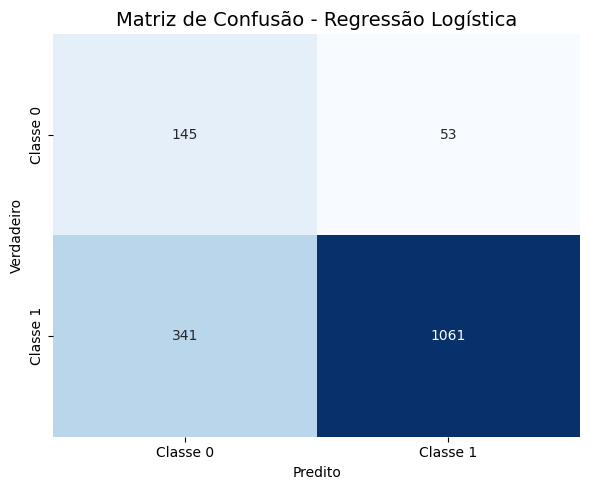

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# gerar matriz
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])

plt.title("Matriz de Confusão - Regressão Logística", fontsize=14)
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.tight_layout()
plt.show()


In [25]:
# Segundo modelo Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score

rf = Pipeline(steps=[
    ("prep", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        class_weight="balanced",
        max_depth=None,
        n_jobs=-1
    ))
])

rf.fit(X_train, y_train)
y_pred_rf  = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

print("AUC:", roc_auc_score(y_test, y_proba_rf))
print("PR-AUC (Average Precision):", average_precision_score(y_test, y_proba_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


AUC: 0.8072522658827936
PR-AUC (Average Precision): 0.9473794265374541

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.05      0.09       198
           1       0.88      1.00      0.94      1402

    accuracy                           0.88      1600
   macro avg       0.82      0.52      0.51      1600
weighted avg       0.86      0.88      0.83      1600

Confusion Matrix:
 [[   9  189]
 [   3 1399]]


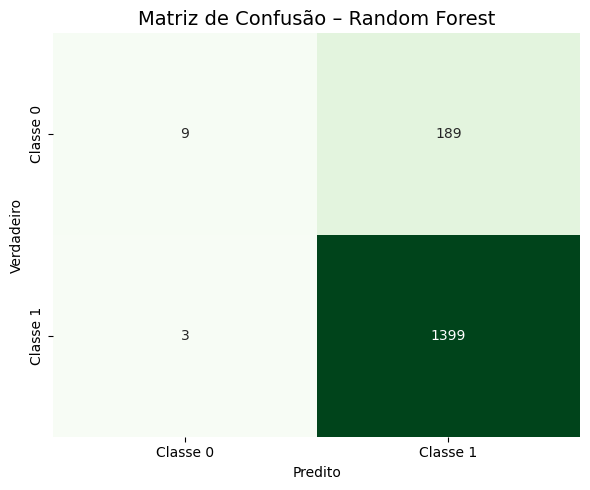

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# gerar matriz
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])

plt.title("Matriz de Confusão – Random Forest", fontsize=14)
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.tight_layout()
plt.show()


In [26]:
from sklearn.metrics import roc_auc_score, average_precision_score

print({
    "LogReg_AUC": roc_auc_score(y_test, y_proba),
    "LogReg_PRAUC": average_precision_score(y_test, y_proba),
    "RF_AUC": roc_auc_score(y_test, y_proba_rf),
    "RF_PRAUC": average_precision_score(y_test, y_proba_rf)
})


{'LogReg_AUC': np.float64(0.7815674577443479), 'LogReg_PRAUC': np.float64(0.9450744469412143), 'RF_AUC': np.float64(0.8072522658827936), 'RF_PRAUC': np.float64(0.9473794265374541)}


In [30]:
# 1) Extrair o modelo treinado
rf_est = rf.named_steps["model"]

# 2) Extrair o transformer de NUMÉRICAS e CATEGÓRICAS
prep = rf.named_steps["prep"]

num_features = prep.named_transformers_["num"].get_feature_names_out().tolist()
cat_features = prep.named_transformers_["cat"].get_feature_names_out().tolist()

# 3) Lista final de features que realmente entraram no modelo
feature_names = num_features + cat_features

# 4) Importâncias
fi = (
    pd.DataFrame({
        "feature": feature_names,
        "importance": rf_est.feature_importances_
    })
    .sort_values("importance", ascending=False)
)

print(fi.head(20))


                         feature  importance
7                     TimeOnSite    0.091549
6                  PagesPerVisit    0.089180
2                        AdSpend    0.087980
3               ClickThroughRate    0.087508
12                 LoyaltyPoints    0.076504
4                 ConversionRate    0.075200
11             PreviousPurchases    0.065612
9                     EmailOpens    0.062560
5                  WebsiteVisits    0.061717
10                   EmailClicks    0.058082
1                         Income    0.054305
8                   SocialShares    0.051653
0                            Age    0.047401
22       CampaignType_Conversion    0.019727
23        CampaignType_Retention    0.007653
15         CampaignChannel_Email    0.007488
21    CampaignType_Consideration    0.007388
20        CampaignType_Awareness    0.007333
18           CampaignChannel_SEO    0.007003
19  CampaignChannel_Social Media    0.006988


In [40]:
# Forest Threshold
from sklearn.metrics import f1_score, precision_recall_curve, confusion_matrix, classification_report

def melhor_threshold(y_true, y_proba, objetivo="f1"):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_proba)
    thresholds = np.append(thresholds, 1.0)
    if objetivo=="f1":
        f1s = 2*precisions*recalls/(precisions+recalls+1e-12)
        idx = np.nanargmax(f1s)
        return thresholds[idx], precisions[idx], recalls[idx], f1s[idx]
    else:

        alvo = 0.85
        idx = np.where(recalls>=alvo)[0][0] if np.any(recalls>=alvo) else np.argmax(recalls)
        return thresholds[idx], precisions[idx], recalls[idx], 2*precisions[idx]*recalls[idx]/(precisions[idx]+recalls[idx]+1e-12)

thr, p, r, f1 = melhor_threshold(y_test, y_proba_rf, objetivo="f1")
print(f"Threshold ótimo (F1 classe 1): {thr:.3f} | precision={p:.3f} | recall={r:.3f} | F1={f1:.3f}")
y_pred_thr = (y_proba_rf >= thr).astype(int)
print("\nClassification Report @threshold ótimo:\n", classification_report(y_test, y_pred_thr))
print("Confusion Matrix @threshold ótimo:\n", confusion_matrix(y_test, y_pred_thr))


Threshold ótimo (F1 classe 1): 0.720 | precision=0.930 | recall=0.985 | F1=0.957

Classification Report @threshold ótimo:
               precision    recall  f1-score   support

           0       0.82      0.47      0.60       198
           1       0.93      0.99      0.96      1402

    accuracy                           0.92      1600
   macro avg       0.87      0.73      0.78      1600
weighted avg       0.92      0.92      0.91      1600

Confusion Matrix @threshold ótimo:
 [[  94  104]
 [  21 1381]]


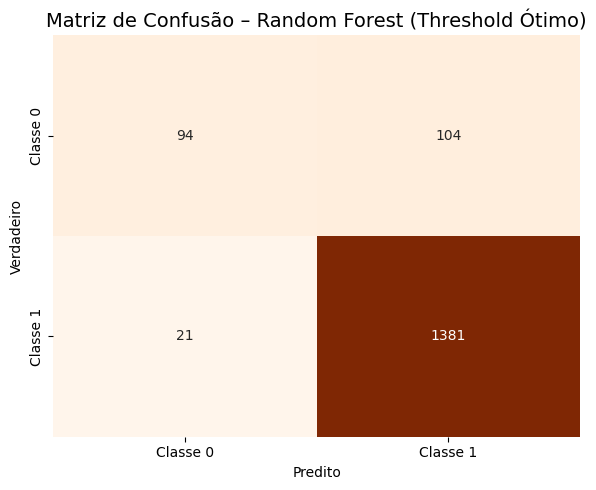

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# gerar matriz
cm_thr = confusion_matrix(y_test, y_pred_thr)

plt.figure(figsize=(6,5))
sns.heatmap(cm_thr, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])

plt.title("Matriz de Confusão – Random Forest (Threshold Ótimo)", fontsize=14)
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.tight_layout()
plt.show()


In [34]:
# Terceiro modelo XGBC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

xgb = Pipeline(steps=[
    ("prep", preprocessor),
    ("model", XGBClassifier(
        n_estimators=300,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.9,
        colsample_bytree=0.9,
        eval_metric="logloss",
        random_state=42
    ))
])

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:,1]


In [35]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_grid = {
    "model__n_estimators": [200, 300, 500],
    "model__max_depth": [4, 5, 6, 7, 8],
    "model__learning_rate": [0.01, 0.03, 0.05, 0.1],
    "model__subsample": [0.7, 0.8, 0.9, 1.0],
    "model__colsample_bytree": [0.7, 0.8, 0.9, 1.0]
}
rnd = RandomizedSearchCV(
    xgb,
    param_distributions=param_grid,
    n_iter=20,
    scoring="roc_auc",
    cv=3,
    verbose=1,
    n_jobs=-1
)
rnd.fit(X_train, y_train)

best_xgb = rnd.best_estimator_


Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [77]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score
# Probabilidades e classe prevista
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]
y_pred_xgb  = best_xgb.predict(X_test)


In [45]:
print("AUC:", roc_auc_score(y_test, y_proba_xgb))
print("PR-AUC:", average_precision_score(y_test, y_proba_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


AUC: 0.8175802244989121
PR-AUC: 0.9497151510846789

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.40      0.55       198
           1       0.92      0.99      0.96      1402

    accuracy                           0.92      1600
   macro avg       0.90      0.70      0.75      1600
weighted avg       0.92      0.92      0.91      1600

Confusion Matrix:
 [[  79  119]
 [  11 1391]]


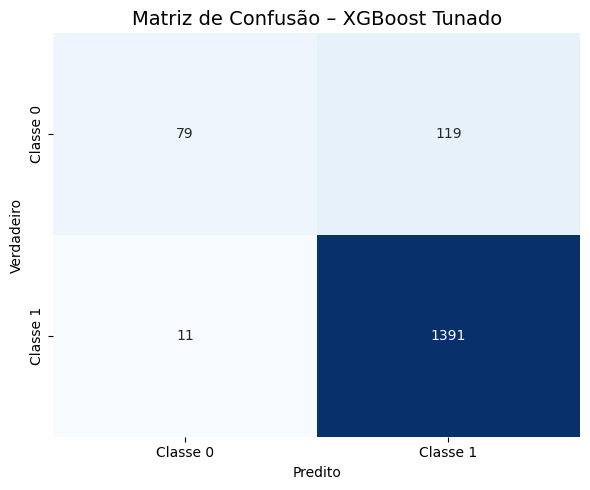

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# gerar matriz
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6,5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])

plt.title("Matriz de Confusão – XGBoost Tunado", fontsize=14)
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.tight_layout()
plt.show()


In [46]:
y_proba_thr = y_proba_rf


                Model   ROC_AUC    PR_AUC  Precision    Recall        F1
0  LogisticRegression  0.781567  0.945074   0.952424  0.756776  0.843402
1        RandomForest  0.807252  0.947379   0.880982  0.997860  0.935786
2     RandomForest_Th  0.807252  0.947379   0.929966  0.985021  0.956702
3       XGBoost_Tuned  0.817580  0.949715   0.921192  0.992154  0.955357


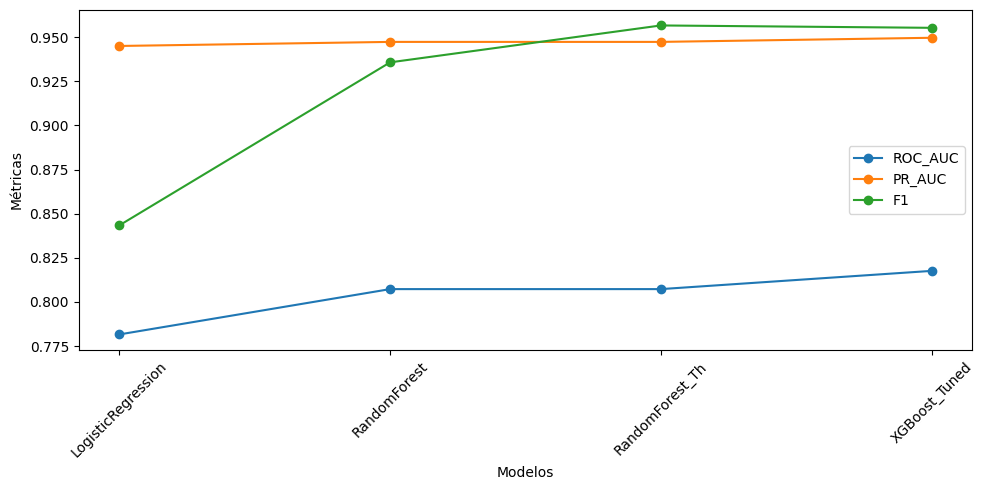

In [48]:
# Comparativo dos modelos
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, average_precision_score, precision_score, recall_score, f1_score

model_names = ["LogisticRegression", "RandomForest", "RandomForest_Th", "XGBoost_Tuned"]

prob_list = [
    y_proba,
    y_proba_rf,
    y_proba_thr,
    y_proba_xgb
]

pred_list = [
    y_pred,
    y_pred_rf,
    y_pred_thr,
    y_pred_xgb
]

metrics = []
for name, proba, pred in zip(model_names, prob_list, pred_list):
    metrics.append({
        "Model": name,
        "ROC_AUC": roc_auc_score(y_test, proba),
        "PR_AUC": average_precision_score(y_test, proba),
        "Precision": precision_score(y_test, pred, zero_division=0),
        "Recall": recall_score(y_test, pred, zero_division=0),
        "F1": f1_score(y_test, pred, zero_division=0)
    })

df_metrics = pd.DataFrame(metrics)
print(df_metrics)

plt.figure(figsize=(10,5))
plt.plot(df_metrics["Model"], df_metrics["ROC_AUC"], marker="o", label="ROC_AUC")
plt.plot(df_metrics["Model"], df_metrics["PR_AUC"], marker="o", label="PR_AUC")
plt.plot(df_metrics["Model"], df_metrics["F1"], marker="o", label="F1")
plt.xticks(rotation=45)
plt.xlabel("Modelos")
plt.ylabel("Métricas")
plt.legend()
plt.tight_layout()
plt.show()


In [111]:
# Validação cruzada
from sklearn.model_selection import cross_val_score
import numpy as np

models = {
    "LogReg": log_reg,
    "RF": rf,
    "RF_Threshold_Model": rf,
    "XGB_Tuned": best_xgb
}

results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="roc_auc", n_jobs=-1)
    results[name] = {
        "AUC_mean": np.mean(scores),
        "AUC_std": np.std(scores),
        "scores": scores
    }

import pandas as pd
df_cv = pd.DataFrame(results).T
print(df_cv)


                    AUC_mean   AUC_std  \
LogReg              0.795337  0.026765   
RF                  0.819576  0.026354   
RF_Threshold_Model  0.819576  0.026354   
XGB_Tuned           0.835411  0.027113   

                                                               scores  
LogReg              [0.7602100679166949, 0.7933166362056907, 0.772...  
RF                  [0.7851542227938356, 0.8109416954353664, 0.804...  
RF_Threshold_Model  [0.7851542227938356, 0.8109416954353664, 0.804...  
XGB_Tuned           [0.798427311085539, 0.8343543401250028, 0.8151...  


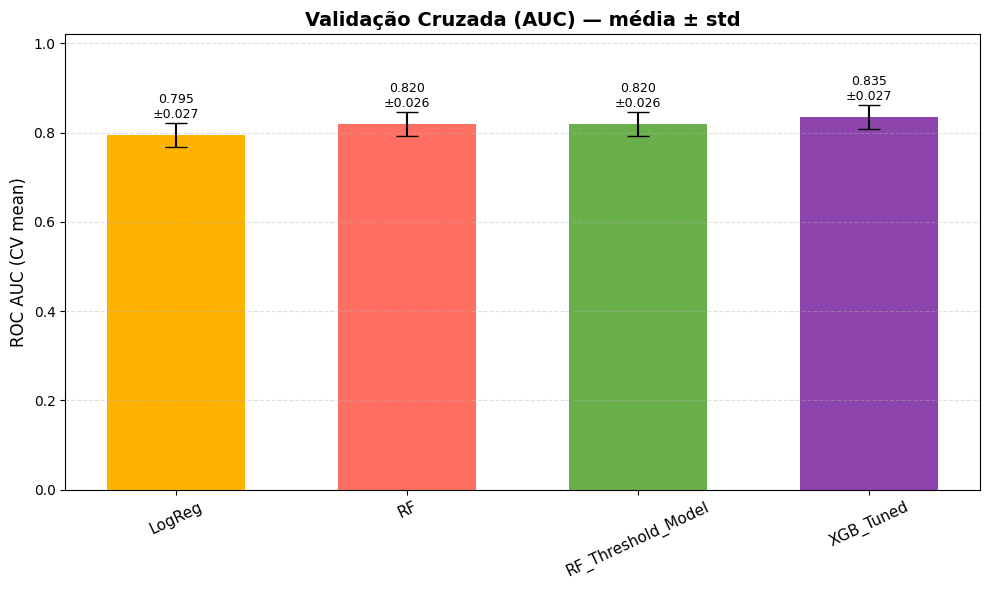

In [112]:
import numpy as np
import matplotlib.pyplot as plt

# preparar dados
models = df_cv.index.tolist()
means = df_cv["AUC_mean"].values
stds = df_cv["AUC_std"].values
scores = df_cv["scores"].values  # lista/array de arrays

# gráfico 1: barras com erro
x = np.arange(len(models))
width = 0.6

fig, ax = plt.subplots(figsize=(10,6))
bars = ax.bar(x, means, width, yerr=stds, capsize=8, color=["#FFB300","#FF6F61","#6AB04A","#8E44AD"])
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=25, fontsize=11)
ax.set_ylabel("ROC AUC (CV mean)", fontsize=12)
ax.set_title("Validação Cruzada (AUC) — média ± std", fontsize=14, weight="bold")
ax.set_ylim(0,1.02)

for i, (m,s) in enumerate(zip(means, stds)):
    ax.annotate(f"{m:.3f}\n±{s:.3f}", xy=(x[i], m), xytext=(0,10), textcoords="offset points", ha="center", va="bottom", fontsize=9)

plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
#plt.savefig("/mnt/data/cv_comparison_bars.png", dpi=200)
plt.show()


/tmp/ipython-input-1746637011.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(scores_list, labels=models, patch_artist=True,


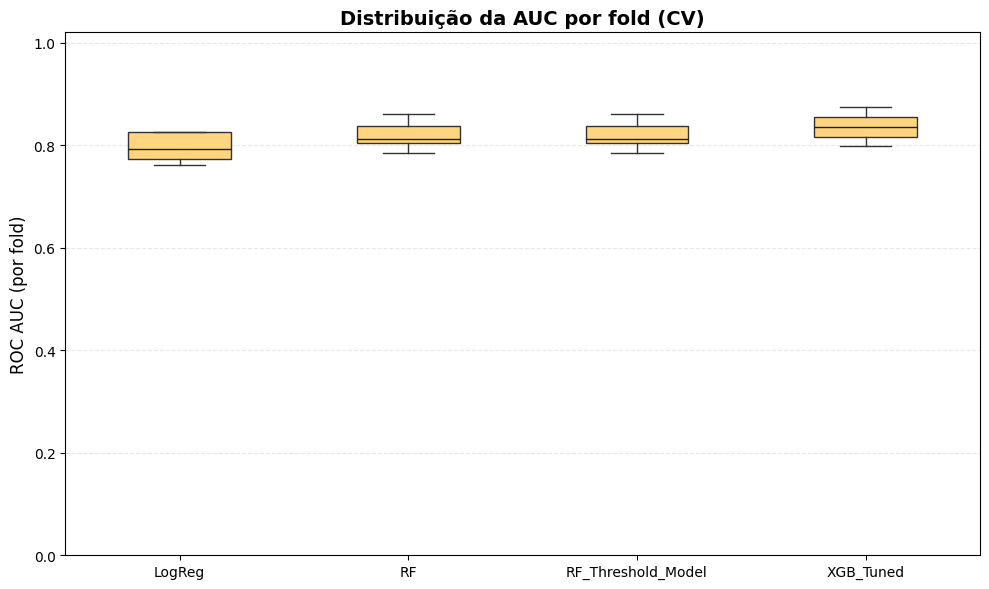

In [113]:
import matplotlib.pyplot as plt

# garantir que scores seja uma lista de listas/numpy arrays
scores_list = [np.array(s) for s in df_cv["scores"].values]

fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(scores_list, labels=models, patch_artist=True,
           boxprops=dict(facecolor="#FFD580", color="#333333"),
           medianprops=dict(color="#1B1B1B"),
           whiskerprops=dict(color="#333333"),
           capprops=dict(color="#333333"),
           flierprops=dict(markerfacecolor="#FF6F61", markeredgecolor="#FF6F61"))
ax.set_ylabel("ROC AUC (por fold)", fontsize=12)
ax.set_title("Distribuição da AUC por fold (CV)", fontsize=14, weight="bold")
ax.set_ylim(0,1.02)
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
#plt.savefig("/mnt/data/cv_comparison_boxplot.png", dpi=200)
plt.show()


In [115]:
import pandas as pd
import numpy as np

# 1) preprocessor que foi ajustado no pipeline (mesmo que treinou o modelo)
prep = log_reg.named_steps["prep"]

# 2)

feature_names = prep.get_feature_names_out(X_train.columns).tolist()

# 3) coef do modelo (binário -> coef_[0])
coef = log_reg.named_steps["model"].coef_[0]

# checagem
print("len(feature_names) =", len(feature_names))
print("len(coef) =", coef.shape[0])

# 4) dataframe final
df_coef = pd.DataFrame({"feature": feature_names, "coef": coef})
df_coef["impact"] = np.where(df_coef["coef"] > 0, "Aumenta conversão", "Diminui conversão")
df_coef = df_coef.sort_values("coef", ascending=False).reset_index(drop=True)
df_coef.head(20)


len(feature_names) = 24
len(coef) = 24


feature      coef             impact
0        cat__CampaignType_Conversion  0.602462  Aumenta conversão
1               num__ClickThroughRate  0.450094  Aumenta conversão
2                     num__TimeOnSite  0.437079  Aumenta conversão
3                    num__EmailClicks  0.415578  Aumenta conversão
4                        num__AdSpend  0.384497  Aumenta conversão
5                     num__EmailOpens  0.381230  Aumenta conversão
6                  num__LoyaltyPoints  0.364626  Aumenta conversão
7              num__PreviousPurchases  0.361753  Aumenta conversão
8                  num__PagesPerVisit  0.293794  Aumenta conversão
9                 num__ConversionRate  0.265492  Aumenta conversão
10                 num__WebsiteVisits  0.234212  Aumenta conversão
11      cat__CampaignChannel_Referral  0.197624  Aumenta conversão
12           cat__CampaignChannel_PPC  0.196538  Aumenta conversão
13                   cat__Gender_Male  0.175464  Aumenta conversão
14                 cat__Gender_Female  0.094590  Aumenta conversão
15                        num__Income  0.046721  Aumenta conversão
16           cat__CampaignChannel_SEO  0.009574  Aumenta conversão
17                           num__Age -0.018622  Diminui conversão
18                  num__SocialShares -0.024587  Diminui conversão
19  cat__CampaignChannel_Social Media -0.061915  Diminui conversão

from matplotlib import pyplot as plt
_df_0['coef'].plot(kind='hist', bins=20, title='coef')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('impact').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['coef'].plot(kind='line', figsize=(8, 4), title='coef')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['impact'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='coef', y='impact', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [117]:
!pip install shap --quiet
import shap
import numpy as np


In [36]:
X_train_transformed = best_xgb.named_steps["prep"].transform(X_train)
X_test_transformed  = best_xgb.named_steps["prep"].transform(X_test)
model_xgb = best_xgb.named_steps["model"]


In [37]:
num_features = preprocessor.named_transformers_["num"].get_feature_names_out(num_cols).tolist()
cat_features = preprocessor.named_transformers_["cat"].get_feature_names_out(cat_cols).tolist()
feature_names = num_features + cat_features


In [38]:
explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer.shap_values(X_test_transformed)


In [39]:
explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer.shap_values(X_test_transformed)


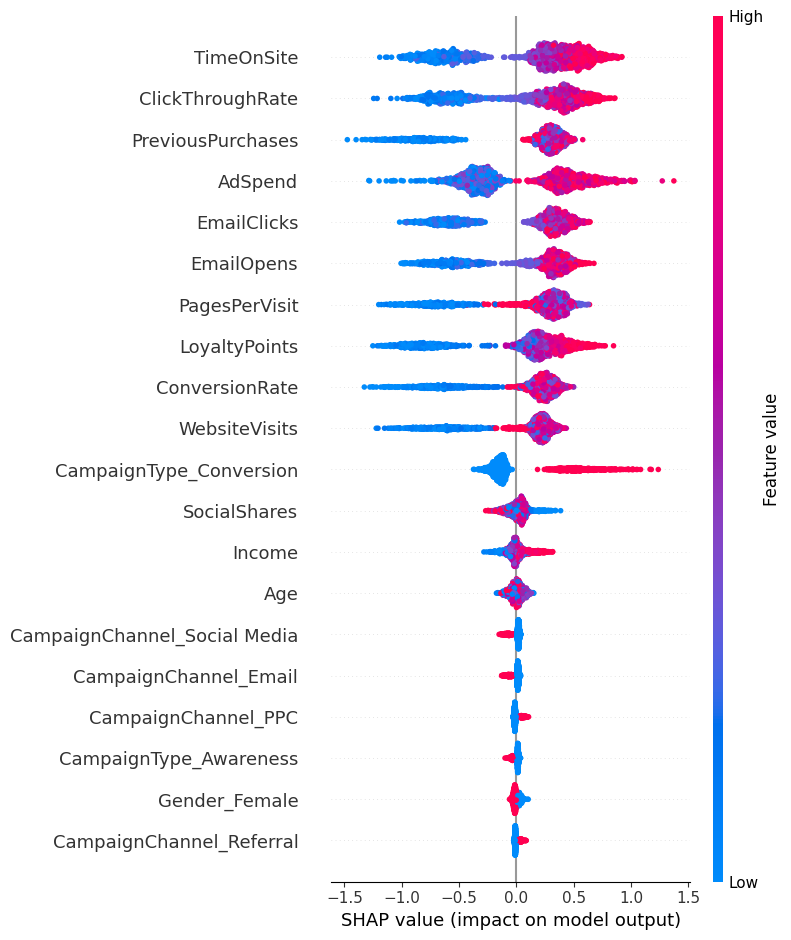

In [40]:
shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names)


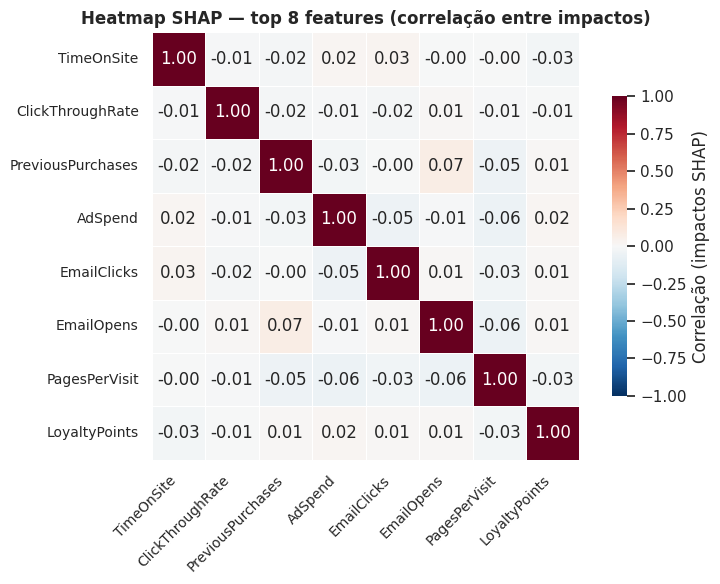

NameError: name 'out_path' is not defined

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap
#
if "shap_values" not in globals():
    X_test_transformed = best_xgb.named_steps["prep"].transform(X_test)
    explainer = shap.TreeExplainer(best_xgb.named_steps["model"])
    shap_values = explainer.shap_values(X_test_transformed)

num_features = preprocessor.named_transformers_["num"].get_feature_names_out(num_cols).tolist()
cat_features = preprocessor.named_transformers_["cat"].get_feature_names_out(cat_cols).tolist()
feature_names = num_features + cat_features

# dataframe dos SHAP values
shap_df = pd.DataFrame(shap_values, columns=feature_names)
#
top8 = shap_df.abs().mean().sort_values(ascending=False).head(8).index.tolist()
shap_top = shap_df[top8]
#
corr = shap_top.corr()
#
vmax = np.nanmax(np.abs(corr.values))
vmax = np.ceil(vmax * 100) / 100

#
plt.figure(figsize=(8,6))
sns.set_theme(style="white")

ax = sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    vmin=-vmax,
    vmax=vmax,
    center=0,
    square=True,
    linewidths=0.6,
    linecolor="white",
    cbar_kws={"shrink":0.7, "label":"Correlação (impactos SHAP)"}
)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.title("Heatmap SHAP — top 8 features (correlação entre impactos)", fontsize=12, weight="bold")
plt.tight_layout()
plt.show()

print("Heatmap salvo em:", out_path)



===== TABELA DE LIFT / GAINS =====
   decile  total  converted  conversion_rate  cum_converted  cum_total  \
0       1    160        153          0.95625            153        160   
1       2    160        150          0.93750            303        320   
2       3    160        152          0.95000            455        480   
3       4    160        153          0.95625            608        640   
4       5    160        155          0.96875            763        800   
5       6    160        153          0.95625            916        960   
6       7    160        155          0.96875           1071       1120   
7       8    160        151          0.94375           1222       1280   
8       9    160        143          0.89375           1365       1440   
9      10    160         37          0.23125           1402       1600   

   cum_rate      lift  cum_lift  
0  0.956250  1.091298  1.091298  
1  0.946875  1.069900  1.080599  
2  0.947917  1.084165  1.081788  
3  0.950000  

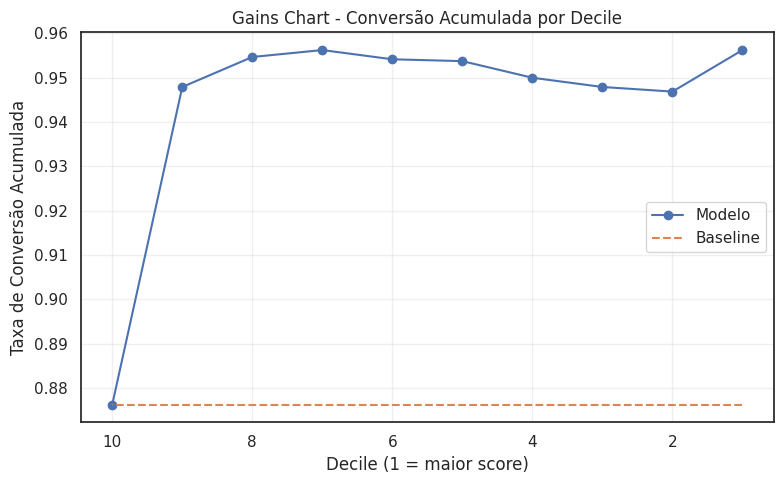

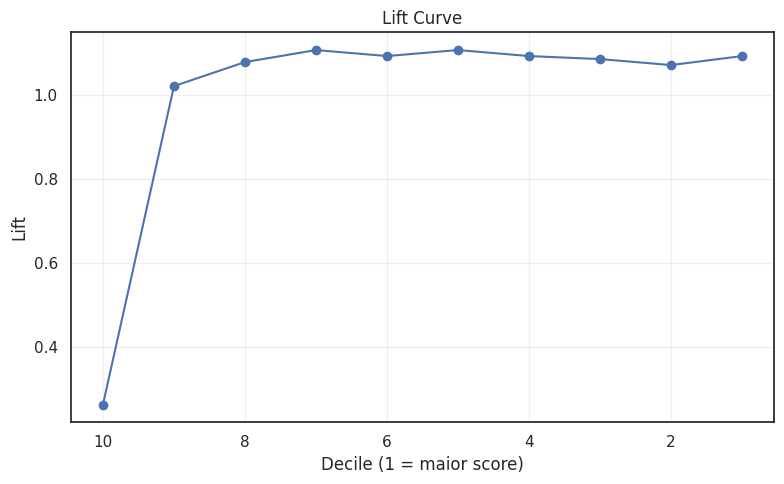

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 1) Criar tabela com deciles

df_lift = pd.DataFrame({
    "y_true": y_test,
    "score": y_proba_xgb
})

# ordenar por score decrescente
df_lift = df_lift.sort_values("score", ascending=False).reset_index(drop=True)

# criar deciles (10 grupos iguais)
df_lift["decile"] = pd.qcut(df_lift["score"], 10, labels=False, duplicates="drop")

# inverter para decile 1 ser o melhor (maior score)
df_lift["decile"] = 10 - df_lift["decile"]

# tabela de resumo por decile
lift_table = df_lift.groupby("decile").agg(
    total=("y_true", "count"),
    converted=("y_true", "sum")
).reset_index()

lift_table["conversion_rate"] = lift_table["converted"] / lift_table["total"]
lift_table["cum_converted"] = lift_table["converted"].cumsum()
lift_table["cum_total"] = lift_table["total"].cumsum()
lift_table["cum_rate"] = lift_table["cum_converted"] / lift_table["cum_total"]

overall_rate = df_lift["y_true"].mean()
lift_table["lift"] = lift_table["conversion_rate"] / overall_rate
lift_table["cum_lift"] = lift_table["cum_rate"] / overall_rate

print("\n===== TABELA DE LIFT / GAINS =====")
print(lift_table)


# 2) Gains Chart

plt.figure(figsize=(8, 5))
plt.plot(lift_table["decile"], lift_table["cum_rate"], marker="o", label="Modelo")
plt.plot(lift_table["decile"], [overall_rate]*len(lift_table), "--", label="Baseline")
plt.xlabel("Decile (1 = maior score)")
plt.ylabel("Taxa de Conversão Acumulada")
plt.title("Gains Chart - Conversão Acumulada por Decile")
plt.gca().invert_xaxis()
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 3) Lift Curve
# ==========================
plt.figure(figsize=(8, 5))
plt.plot(lift_table["decile"], lift_table["lift"], marker="o", label="Lift por Decile")
plt.xlabel("Decile (1 = maior score)")
plt.ylabel("Lift")
plt.title("Lift Curve")
plt.gca().invert_xaxis()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [6]:
custo_total = df["AdSpend"].sum()
conversoes = df["Conversion"].sum()
valor_medio = custo_total / conversoes
valor_medio


np.float64(5705.584518454024)

In [7]:
# Métricas básicas do AdSpend
ad = df["AdSpend"].astype(float)
media   = ad.mean()
mediana = ad.median()
std     = ad.std()
minimo  = ad.min()
maximo  = ad.max()
soma    = ad.sum()
print("MÉTRICAS DO ADSPEND")
print(f"Média:     {media:,.2f}")
print(f"Mediana:   {mediana:,.2f}")
print(f"Desvio P.: {std:,.2f}")
print(f"Mínimo:    {minimo:,.2f}")
print(f"Máximo:    {maximo:,.2f}")
print(f"Soma:      {soma:,.2f}")


MÉTRICAS DO ADSPEND
Média:     5,000.94
Mediana:   5,013.44
Desvio P.: 2,838.04
Mínimo:    100.05
Máximo:    9,997.91
Soma:      40,007,558.64


In [20]:
#

target = "Conversion"
num_cols = ['Age','Income','ClickThroughRate','ConversionRate','WebsiteVisits',
            'PagesPerVisit','TimeOnSite','SocialShares','EmailOpens','EmailClicks',
            'PreviousPurchases','LoyaltyPoints','AdSpend']

cat_cols = ['Gender','CampaignChannel','CampaignType']

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ],
    remainder="drop"
)
#
X = df_clean.drop(columns=[target])
y = df_clean[target]

preprocessor.fit(X)  #


ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Age', 'Income', 'ClickThroughRate',
                                  'ConversionRate', 'WebsiteVisits',
                                  'PagesPerVisit', 'TimeOnSite', 'SocialShares',
                                  'EmailOpens', 'EmailClicks',
                                  'PreviousPurchases', 'LoyaltyPoints',
                                  'AdSpend']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Gender', 'CampaignChannel',
                                  'CampaignType'])])

In [46]:
X_transformed = preprocessor.transform(X)


In [47]:

import pprint
import numpy as np

# 1)
assert "df_clean" in globals(), "Não achei 'df_clean' no ambiente. Carrega a base primeiro."

# 2)
print("Colunas do df_clean (exemplo):")
print(df_clean.columns.tolist()[:50])

# 3)
expected_cols = None

# preferência por atributo mais direto (sklearn >= 1.0)
if hasattr(preprocessor, "feature_names_in_"):
    expected_cols = list(preprocessor.feature_names_in_)
    print("\nPreprocessor.feature_names_in_ encontrado.")
else:
    #
    try:
        cols_num = list(preprocessor.transformers_[0][2])
        cols_cat = list(preprocessor.transformers_[1][2])
        expected_cols = cols_num + cols_cat
        print("\nExtraí expected_cols a partir de preprocessor.transformers_.")
    except Exception as e:
        print("\nNão consegui extrair expected_cols automaticamente.")
        print("Erro:", e)

# 4) reportar expected_cols
if expected_cols is None:
    raise RuntimeError("Não foi possível descobrir as colunas esperadas pelo preprocessor. "
                       "Verifique como o preprocessor foi criado.")
print("\nColunas esperadas pelo preprocessor (exemplo, primeiras 50):")
pprint.pprint(expected_cols[:50])

# 5)
#
X_candidate = df_clean.copy()

missing = [c for c in expected_cols if c not in X_candidate.columns]
extra   = [c for c in X_candidate.columns if c not in expected_cols]

print(f"\nColunas faltando em X (que o preprocessor espera): {missing}")
print(f"Total faltando: {len(missing)}")
print(f"Excesso de colunas em X (serão ignoradas se transformarmos apenas as esperadas): {len(extra)}")

# 6)
if len(missing) > 0:
    #
    print("\nTentando corrigir automaticamente...")
    #
    #
    for m in missing[:]:
        # tentativa de correção por case-insensitive match
        matches = [c for c in X_candidate.columns if c.lower() == m.lower()]
        if matches:
            print(f" - Corrigindo nome {m} -> {matches[0]}")
            X_candidate[m] = X_candidate[matches[0]]
            missing.remove(m)
    #
    if len(missing) > 0:
        print("Ainda faltando colunas após tentativa de correção por case. Vou criar colunas faltantes com NaN (você pode preencher depois).")
        for m in missing:
            X_candidate[m] = np.nan
        print("Colunas faltantes criadas com NaN. ATENÇÃO: preencha/avalie esses NaN antes de usar o modelo em produção.")
else:
    print("Nenhuma coluna faltando — tudo ok.")

# 7)
X_final = X_candidate[expected_cols]

# 8) checagem de n_features
print(f"\nX_final.shape = {X_final.shape}")
if hasattr(preprocessor, "n_features_in_"):
    print("preprocessor.n_features_in_ =", preprocessor.n_features_in_)

# 9) transformar e prever
    X_transformed = preprocessor.transform(X_final)
    print("Transform OK — forma resultante:", getattr(X_transformed, "shape", "unknown"))
    #
    if "best_xgb" in globals():
        model = best_xgb
    elif "best_model" in globals():
        model = best_model
    elif "model" in globals() and hasattr(model, "predict_proba"):
        model = model
    else:
        raise NameError("Nenhum modelo encontrado (procure por best_xgb ou best_model).")

    proba = model.predict_proba(X_transformed)[:, 1]
    df_clean["prob_convert"] = proba
    print("Probabilidade adicionada em df_clean['prob_convert']. Exemplo head():")
    display(df_clean[["prob_convert"]].head())
except Exception as err:
    print("\nERRO durante transform/predict:")
    import traceback
    traceback.print_exc()
    # imprimir diagnóstico adicional
    print("\nDICAS:")
    print("- Confirme se 'preprocessor' foi treinado com o mesmo conjunto de colunas.")
    print("- Se você recriou preprocessor recentemente, garanta que as colunas listadas em expected_cols existem no df_clean.")
    print("- Se preprocessor espera AdSpend e você removeu AdSpend do X, re-inclua-o antes de transformar.")


Colunas do df_clean (exemplo):
['Age', 'Gender', 'Income', 'CampaignChannel', 'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints', 'Conversion']

Preprocessor.feature_names_in_ encontrado.

Colunas esperadas pelo preprocessor (exemplo, primeiras 50):
['Age',
 'Gender',
 'Income',
 'CampaignChannel',
 'CampaignType',
 'AdSpend',
 'ClickThroughRate',
 'ConversionRate',
 'WebsiteVisits',
 'PagesPerVisit',
 'TimeOnSite',
 'SocialShares',
 'EmailOpens',
 'EmailClicks',
 'PreviousPurchases',
 'LoyaltyPoints']

Colunas faltando em X (que o preprocessor espera): []
Total faltando: 0
Excesso de colunas em X (serão ignoradas se transformarmos apenas as esperadas): 1
Nenhuma coluna faltando — tudo ok.

X_final.shape = (8000, 16)
preprocessor.n_features_in_ = 16
Transform OK — forma resultante: (8000, 24)

ERRO durante transform/predict:

DICAS:
- Confirme 

Traceback (most recent call last):
  File "/tmp/ipython-input-1534251345.py", line 92, in <cell line: 0>
    proba = model.predict_proba(X_transformed)[:, 1]
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", line 903, in predict_proba
    Xt = transform.transform(Xt)
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py", line 1094, in transform
    _check_n_features(self, X, reset=False)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 2829, in _check_n_features
    raise ValueError(
ValueError: X has 24 features, but ColumnTransformer is expecting 16 features as input.


In [48]:
# 1. Recuperar as colunas usadas no treinamento original
cols_treino = list(preprocessor.feature_names_in_)
print("Colunas usadas no treinamento:", cols_treino)

# 2. Garantir que df_clean tem essas colunas
faltando = [c for c in cols_treino if c not in df_clean.columns]
extra = [c for c in df_clean.columns if c not in cols_treino]

print("\nFaltando no df_clean:", faltando)
print("Colunas extras no df_clean (serão ignoradas):", extra)

# 3. Criar X_final
X_final = df_clean[cols_treino]

# 4. Transformar normalmente
X_transformed = preprocessor.transform(X_final)

print("\nTransform OK! Formato:", X_transformed.shape)


Colunas usadas no treinamento: ['Age', 'Gender', 'Income', 'CampaignChannel', 'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints']

Faltando no df_clean: []
Colunas extras no df_clean (serão ignoradas): ['Conversion']

Transform OK! Formato: (8000, 24)


In [120]:
df_clean["CustomerID"] = df["CustomerID"].values


In [119]:
# 1)
print("Shape df_clean:", df_clean.shape)
print(df_clean["Conversion"].value_counts(dropna=False))
print("Soma conversions:", df_clean["Conversion"].sum())

# 2)
print("\nColunas adicionadas (exemplo):", [c for c in ["prob_convert","ExpectedValue"] if c in df_clean.columns])

# 3)
orig = pd.read_csv(path + "/digital_marketing_campaign_dataset.csv")
print("\nShape arquivo original:", orig.shape)
print("Colunas extras em df_clean:", [c for c in df_clean.columns if c not in orig.columns])
print("Colunas faltando em df_clean (vs original):", [c for c in orig.columns if c not in df_clean.columns])


Shape df_clean: (8000, 19)
Conversion
1    7012
0     988
Name: count, dtype: int64
Soma conversions: 7012

Colunas adicionadas (exemplo): ['prob_convert']

Shape arquivo original: (8000, 20)
Colunas extras em df_clean: ['prob_convert', 'valor_esperado']
Colunas faltando em df_clean (vs original): ['CustomerID', 'AdvertisingPlatform', 'AdvertisingTool']


In [122]:
#

# 1)
cols_model = list(best_xgb.feature_names_in_) if hasattr(best_xgb, "feature_names_in_") else None

if cols_model is None:
    #
    try:
        cols_model = list(preprocessor.feature_names_in_)
    except Exception:
        raise RuntimeError("Não consegui obter as colunas do modelo. Verifique 'best_xgb' e 'preprocessor'.")

X_raw = df_clean[cols_model].copy()

# 2)
from sklearn.pipeline import Pipeline
model = best_xgb

if isinstance(model, Pipeline):
    #
    y_proba = model.predict_proba(X_raw)[:, 1]
else:
    #
    X_transformed = preprocessor.transform(X_raw)
    y_proba = model.predict_proba(X_transformed)[:, 1]

# 3)
df_clean["prob_convert"] = y_proba

# 4)
custo_total = df_clean["AdSpend"].sum()
conversoes = df_clean["Conversion"].sum()
if conversoes == 0:
    raise ValueError("Não há conversões na base; não dá pra calcular valor médio por conversão.")
valor_medio = custo_total / conversoes

df_clean["valor_esperado"] = df_clean["prob_convert"] * valor_medio

# 5)
print("Modelo é Pipeline?:", isinstance(model, Pipeline))
print("Shape X_raw:", X_raw.shape)
if not isinstance(model, Pipeline):
    print("Shape X_transformed:", X_transformed.shape)
print(f"Valor médio por conversão: USD {valor_medio:,.2f}")

display(df_clean[["CustomerID", "Age", "Gender","prob_convert", "valor_esperado"]].head(8))




Modelo é Pipeline?: True
Shape X_raw: (8000, 16)
Valor médio por conversão: USD 5,705.58


CustomerID  Age  Gender  prob_convert  valor_esperado
0        8000   56  Female      0.779471     4447.335938
1        8001   69    Male      0.947406     5405.502930
2        8002   46  Female      0.965208     5507.075195
3        8003   32  Female      0.850143     4850.563965
4        8004   60  Female      0.974392     5559.477051
5        8005   25  Female      0.894567     5104.027832
6        8006   38  Female      0.954000     5443.130371
7        8007   56  Female      0.835522     4767.140625

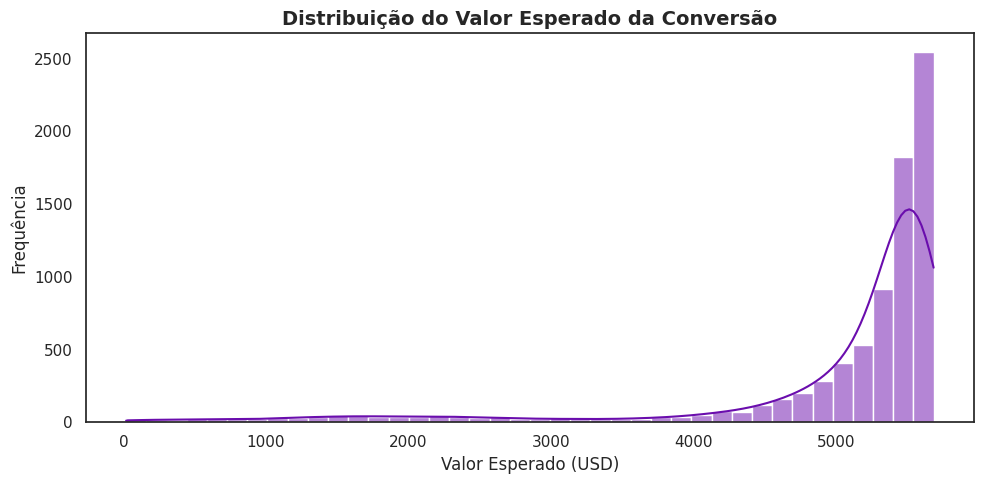

In [52]:
plt.figure(figsize=(10,5))
sns.histplot(df_clean["valor_esperado"], bins=40, kde=True, color="#6A0DAD")
plt.title("Distribuição do Valor Esperado da Conversão", fontsize=14, weight="bold")
plt.xlabel("Valor Esperado (USD)")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()


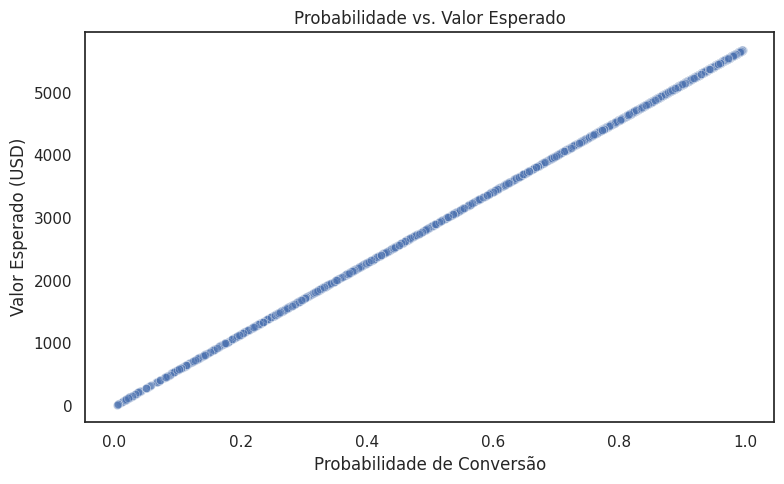

In [53]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_clean["prob_convert"], y=df_clean["valor_esperado"], alpha=0.4)
plt.title("Probabilidade vs. Valor Esperado")
plt.xlabel("Probabilidade de Conversão")
plt.ylabel("Valor Esperado (USD)")
plt.tight_layout()
plt.show()


In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

eng_cols = [
    "WebsiteVisits",
    "PagesPerVisit",
    "TimeOnSite",
    "SocialShares",
    "EmailOpens",
    "EmailClicks",
    "PreviousPurchases"
]

X_eng = df_clean[eng_cols].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_eng)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_clean["EngagementStage"] = kmeans.fit_predict(X_scaled)


In [175]:
df_clean.groupby("EngagementStage")[eng_cols].mean()


WebsiteVisits  PagesPerVisit  TimeOnSite  SocialShares  \
EngagementStage                                                           
0                    24.204204       5.544234    7.712392     19.443443   
1                    25.105681       7.982851    7.924169     68.161303   
2                    25.053097       3.091507    7.547294     67.805310   

                 EmailOpens  EmailClicks  PreviousPurchases  
EngagementStage                                              
0                  9.627961     4.330998           4.725392  
1                  9.468415     4.445769           4.166071  
2                  9.303298     4.653660           4.519710

In [176]:
# 1) interpretar clusters (ordenar e renomear para Low/Mid/High)
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

eng_cols = ["WebsiteVisits","PagesPerVisit","TimeOnSite","SocialShares","EmailOpens","EmailClicks","PreviousPurchases"]

# garante que existam as colunas
_missing = [c for c in eng_cols if c not in df_clean.columns]
if _missing:
    raise RuntimeError(f"Faltando colunas de engajamento: {_missing}")

#
sc = StandardScaler()
eng_scaled = sc.fit_transform(df_clean[eng_cols])
df_clean["_eng_score"] = eng_scaled.sum(axis=1)

# se o KMeans já foi rodado, pega, senão roda (segurança)
if "EngagementStage" not in df_clean.columns:
    km = KMeans(n_clusters=3, random_state=42, n_init=10)
    df_clean["EngagementStage"] = km.fit_predict(eng_scaled)
else:
    from sklearn.cluster import KMeans
    #

# calcula média do eng_score por cluster e ordena
cluster_order = df_clean.groupby("EngagementStage")["_eng_score"].mean().sort_values().index.tolist()
mapping = {old: new for new, old in enumerate(cluster_order)}   # 0 = lowest, 2 = highest
df_clean["EngagementStage_ord"] = df_clean["EngagementStage"].map(mapping)

# map textual
label_map = {0:"Low", 1:"Mid", 2:"High"}
df_clean["EngagementStage_label"] = df_clean["EngagementStage_ord"].map(label_map)

print("Contagem por estágio:")
print(df_clean["EngagementStage_label"].value_counts())

print("\nMédias por estágio (engagement cols):")
display(df_clean.groupby("EngagementStage_label")[eng_cols].mean().T)

# 2) preparar dados para treinO
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

#
exclude = ["EngagementStage","EngagementStage_ord","EngagementStage_label","_eng_score","Conversion"]
features = [c for c in df_clean.columns if c not in exclude]
X = df_clean[features].copy()
y = df_clean["EngagementStage_label"].copy()

# separa num e cat
num_cols = X.select_dtypes(include=["int64","float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object","category"]).columns.tolist()

# split stratificado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#
try:
    preprocessor
except NameError:
    preprocessor = ColumnTransformer([
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse=False), cat_cols)
    ], remainder="drop")

# pipeline com XGBoost multiclass
pipe = Pipeline([
    ("prep", preprocessor),
    ("model", XGBClassifier(
        objective="multi:softprob",
        num_class=len(y.unique()),
        n_estimators=200,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42,
        use_label_encoder=False,
        eval_metric="mlogloss",
        n_jobs=-1
    ))
])

pipe.fit(X_train, y_train)

# 3) avaliação
from sklearn.metrics import classification_report, confusion_matrix
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))
print("Confusion matrix:")
display(confusion_matrix(y_test, y_pred))

# 4) SHAP (explicabilidade)
import shap
import numpy as np
import pandas as pd

# extrai transformado e nomes
prep = pipe.named_steps["prep"]
Xt_test = prep.transform(X_test)

# build feature names from ColumnTransformer
def get_feature_names_from_column_transformer(column_transformer):
    feature_names = []
    for name, transformer, cols in column_transformer.transformers_:
        if name == "remainder":
            continue
        if hasattr(transformer, "get_feature_names_out"):
            fn = transformer.get_feature_names_out(cols)
        else:
            # fallback
            fn = cols
        feature_names.extend(fn.tolist() if isinstance(fn, np.ndarray) else list(fn))
    return feature_names

try:
    feature_names = get_feature_names_from_column_transformer(prep)
except Exception:
    # fallback: use input columns expanded (may differ slightly)
    feature_names = list(np.arange(Xt_test.shape[1]).astype(str))

# SHAP explainer
model_est = pipe.named_steps["model"]
explainer = shap.TreeExplainer(model_est)
shap_values = explainer.shap_values(Xt_test)

#
cls_idx = list(pipe.named_steps["model"].classes_).index("High") if "High" in pipe.named_steps["model"].classes_ else -1
shap.summary_plot(shap_values[cls_idx], Xt_test, feature_names=feature_names, show=True)

#
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df_clean, x="EngagementStage_label", order=["Low","Mid","High"])
plt.title("Contagem de clientes por estágio (KMeans)")
plt.xlabel("Estágio")
plt.ylabel("Contagem")
plt.tight_layout()
plt.show()

#
plt.figure(figsize=(10,6))
dfm = df_clean.melt(id_vars=["EngagementStage_label"], value_vars=eng_cols, var_name="metric", value_name="value")
sns.boxplot(data=dfm, x="metric", y="value", hue="EngagementStage_label")
plt.xticks(rotation=45)
plt.title("Distribuição das métricas de engajamento por estágio")
plt.legend(title="Estágio")
plt.tight_layout()
plt.show()


Contagem por estágio:
EngagementStage_label
Low     2997
High    2517
Mid     2486
Name: count, dtype: int64

Médias por estágio (engagement cols):


EngagementStage_label       High        Low        Mid
WebsiteVisits          25.105681  24.204204  25.053097
PagesPerVisit           7.982851   5.544234   3.091507
TimeOnSite              7.924169   7.712392   7.547294
SocialShares           68.161303  19.443443  67.805310
EmailOpens              9.468415   9.627961   9.303298
EmailClicks             4.445769   4.330998   4.653660
PreviousPurchases       4.166071   4.725392   4.519710

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got ['High' 'Low' 'Mid']

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import classification_report, confusion_matrix


In [56]:
target = "Conversion"

# features
excluded = [target, "EngagementStage", "EngagementStage_ord", "EngagementStage_label", "_eng_score", "prob_convert", "valor_esperado"]
features = [c for c in df_clean.columns if c not in excluded]

# separa num / cat
num_cols = df_clean[features].select_dtypes(include=["int64","float64"]).columns.tolist()
cat_cols = df_clean[features].select_dtypes(include=["object","category","bool"]).columns.tolist()

print("Num cols:", num_cols)
print("Cat cols:", cat_cols)

X = df_clean[features].copy()
y = df_clean[target].copy()

# split (estratificado)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# preprocessor: usa existente se houver
try:
    preprocessor
    print("Usando preprocessor existente.")
except NameError:
    preprocessor = ColumnTransformer([
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse=False), cat_cols)
    ], remainder="drop")
    print("Preprocessor criado e pronto.")

# se best_xgb não existe, treina um pipeline simples (fallback)
try:
    best_xgb
    print("best_xgb encontrado no ambiente.")
except NameError:
    pipe_tmp = Pipeline([
        ("prep", preprocessor),
        ("model", XGBClassifier(
            n_estimators=200,
            max_depth=6,
            learning_rate=0.05,
            subsample=0.9,
            colsample_bytree=0.9,
            random_state=42,
            use_label_encoder=False,
            eval_metric="logloss",
            n_jobs=-1
        ))
    ])
    print("Treinando fallback XGBoost (pode demorar uns minutos)...")
    pipe_tmp.fit(X_train, y_train)
    best_xgb = pipe_tmp
    print("Fallback best_xgb treinado.")


Num cols: ['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints', 'CustomerID']
Cat cols: ['Gender', 'CampaignChannel', 'CampaignType']
Usando preprocessor existente.
best_xgb encontrado no ambiente.


In [57]:
y_pred = best_xgb.predict(X_test)
print(classification_report(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.36      0.51       198
           1       0.92      0.99      0.95      1402

    accuracy                           0.92      1600
   macro avg       0.90      0.68      0.73      1600
weighted avg       0.91      0.92      0.90      1600

Confusion matrix:
[[  72  126]
 [  10 1392]]


In [58]:
def get_transformed_feature_names(col_transformer):
    feature_names = []
    for name, trans, cols in col_transformer.transformers_:
        if name == "remainder":
            continue
        if hasattr(trans, "get_feature_names_out"):
            try:
                fn = trans.get_feature_names_out(cols)
            except Exception:
                try:
                    fn = trans.get_feature_names_out()
                except Exception:
                    fn = cols
        else:
            # OneHotEncoder older sklearn
            if hasattr(trans, "categories_"):
                arr = []
                for c, cats in zip(cols, trans.categories_):
                    arr += [f"{c}_{cat}" for cat in cats]
                fn = np.array(arr)
            else:
                fn = cols
        feature_names.extend(list(fn))
    return feature_names

prep = best_xgb.named_steps["prep"]
feature_names = get_transformed_feature_names(prep)
print("n features transformadas:", len(feature_names))
# se algo inválido, fallback para índice
if len(feature_names) != prep.transformers_[0][2].__len__() and len(feature_names) == 0:
    feature_names = [f"f{i}" for i in range(prep.transform(X.head()).shape[1])]


n features transformadas: 24


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/shap_summary.png'

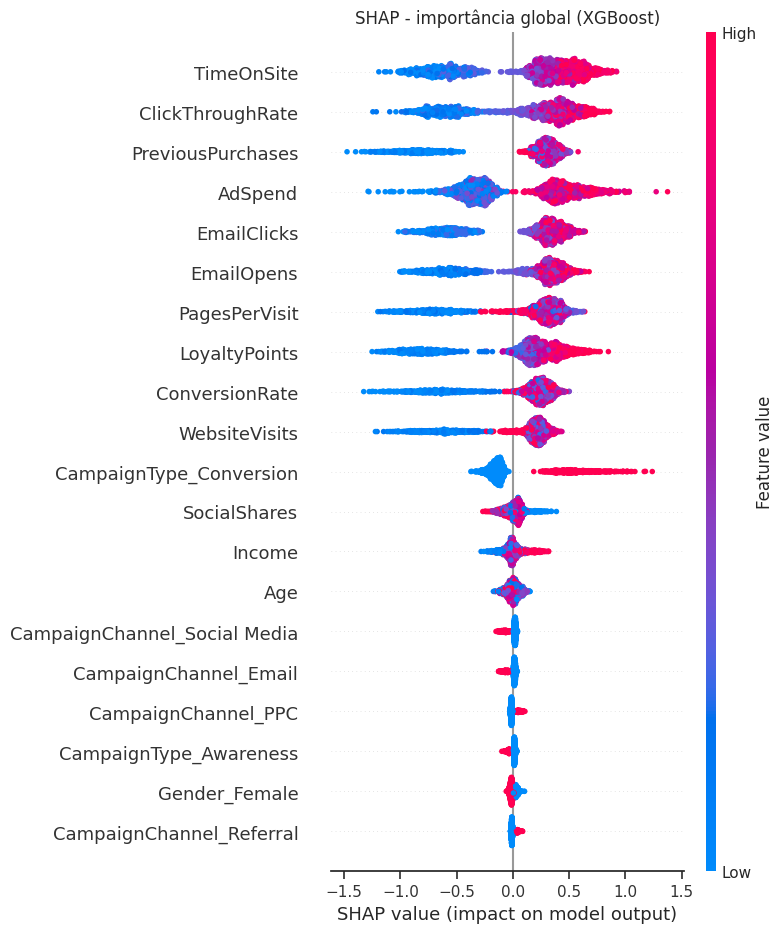

In [59]:
# transforma X_test (ou X_train se preferir)
X_test_t = prep.transform(X_test)

# SHAP explainer
model_est = best_xgb.named_steps["model"]
explainer = shap.TreeExplainer(model_est)
shap_values = explainer(X_test_t)

# summary plot (global)
plt.figure(figsize=(10,6))
shap.summary_plot(shap_values.values, X_test_t, feature_names=feature_names, max_display=20, show=False)
plt.title("SHAP - importância global (XGBoost)")
plt.tight_layout()
plt.savefig("/mnt/data/shap_summary.png", dpi=200)
plt.show()
print("Saved: /mnt/data/shap_summary.png")


In [21]:
# calcula mean(|shap|)
mean_abs_shap = np.abs(shap_values.values).mean(axis=0)
shap_df = pd.DataFrame({"feature": feature_names, "mean_abs_shap": mean_abs_shap})
shap_df = shap_df.sort_values("mean_abs_shap", ascending=False).reset_index(drop=True)
topk = shap_df.feature.head(5).tolist()
print("Top features SHAP:", topk)

# dependence plots para top 3
top3 = topk[:3]
for feat in top3:
    if feat not in feature_names:
        print("Pulando:", feat)
        continue
    idx = feature_names.index(feat)
    plt.figure(figsize=(7,5))
    shap.dependence_plot(idx, shap_values.values, X_test_t, feature_names=feature_names, interaction_index=None, show=False)
    plt.title(f"SHAP Dependence - {feat}")
    plt.tight_layout()

    plt.show()



NameError: name 'shap_values' is not defined

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/shap_interaction.png'

<Figure size 800x600 with 0 Axes>

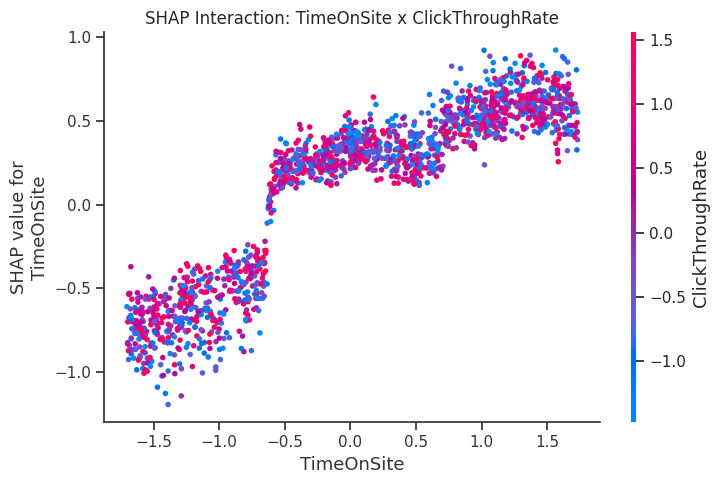

In [61]:
if len(topk) >= 2:
    main = topk[0]
    inter = topk[1]
    idx_main = feature_names.index(main)
    idx_inter = feature_names.index(inter)
    plt.figure(figsize=(8,6))
    shap.dependence_plot(idx_main, shap_values.values, X_test_t, feature_names=feature_names, interaction_index=idx_inter, show=False)
    plt.title(f"SHAP Interaction: {main} x {inter}")
    plt.tight_layout()
    plt.savefig("/mnt/data/shap_interaction.png", dpi=200)
    plt.show()
    print("Saved: /mnt/data/shap_interaction.png")
else:
    print("Não há features suficientes para interaction plot.")


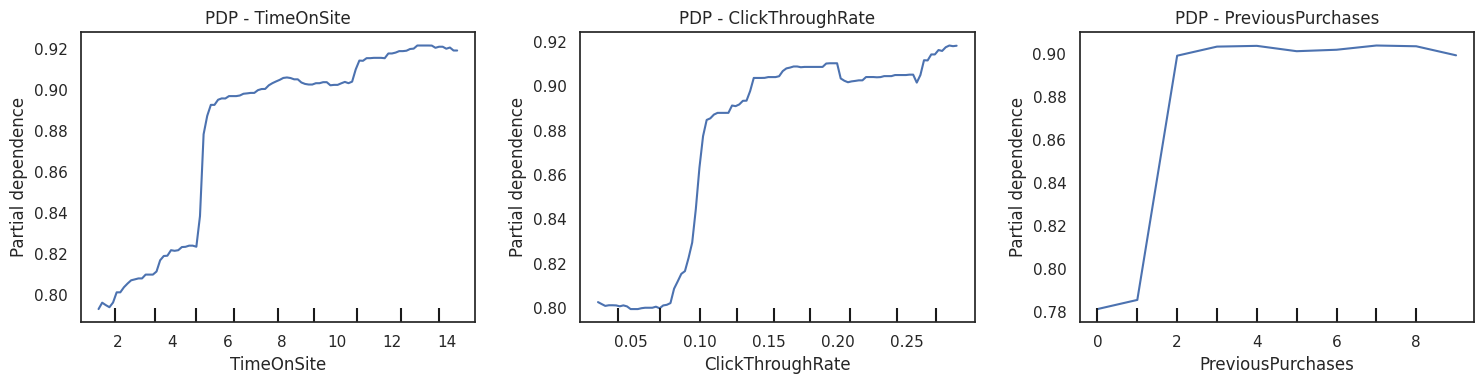

In [81]:
pdp_features = top3  # usa as top 3 do shap
fig, axes = plt.subplots(1, len(pdp_features), figsize=(5*len(pdp_features),4))
for ax, feat in zip(axes.flatten(), pdp_features):
    PartialDependenceDisplay.from_estimator(best_xgb, X, [feat], ax=ax)
    ax.set_title(f"PDP - {feat}")
plt.tight_layout()
#plt.savefig("/mnt/data/pdp_plots.png", dpi=200)
plt.show()
#print("Saved: /mnt/data/pdp_plots.png")


In [85]:
X_train_columns = list(X_train.columns)


In [86]:
i = 10   # índice do cliente que você quer
sample = X_test.iloc[[i]].copy()
# alinhar para ter mesmas colunas do treino
sample = sample.reindex(columns=X_train_columns, fill_value=0)
# criar DMatrix
dmat = xgb.DMatrix(sample.values, feature_names=X_train_columns)
# pegar as folhas de todas as árvores
booster = model.get_booster()
leaf_indexes = booster.predict(dmat, pred_leaf=True)

leaf_indexes



array([[100., 120.,  94.,  82.,  78.,  99.,  80., 102.,  37., 112.,  72.,
         91.,  83., 105.,  70.,  73.,  62.,  77.,  83.,  95.,  81.,  72.,
         75.,  42.,  69., 102.,  69.,  73.,  86.,  88.,  97.,  52.,  73.,
         70.,  69.,  82.,  70.,  96.,  80.,  71.,  66.,  92.,  64.,  63.,
         88.,  64.,  58.,  46.,  50.,  78.,  60.,  75.,  60.,  60.,  64.,
         53.,  49.,  77.,  70.,  85.,  31.,  61.,  53.,  46.,  51.,  59.,
         43.,  57.,  40.,  72.,  81.,  58.,  65.,  68.,  63.,  59.,  33.,
         47.,  53.,  67.,  43.,  43.,  40.,   9.,  63.,  81.,  56.,  57.,
         54.,  71.,  46.,  79.,  63.,  60.,  48.,  64.,  43.,  42.,  32.,
         22.]], dtype=float32)

In [88]:
import shap
import numpy as np
import pandas as pd

explainer = shap.TreeExplainer(model)
shap_inter = explainer.shap_interaction_values(X_test)

# vamos somar só os casos positivos (converte = 1)
mask = y_test == 1
shap_pos = shap_inter[mask]

# somar interações absolutas
interaction_matrix = np.abs(shap_pos).mean(axis=0)

# transformar em dataframe
feat_names = X_test.columns
rows = []
for i in range(len(feat_names)):
    for j in range(i+1, len(feat_names)):
        rows.append({
            'feature_1': feat_names[i],
            'feature_2': feat_names[j],
            'interaction_strength': interaction_matrix[i, j]
        })

df_inter = pd.DataFrame(rows).sort_values(
    'interaction_strength',
    ascending=False
)

# Top 20 "caminhos"
df_inter.head(20)


feature_1                feature_2  interaction_strength
52            AdSpend              EmailClicks              0.104962
73   ClickThroughRate        PreviousPurchases              0.102971
172        EmailOpens        PreviousPurchases              0.097973
68   ClickThroughRate            PagesPerVisit              0.097860
49            AdSpend               TimeOnSite              0.097168
48            AdSpend            PagesPerVisit              0.096099
88     ConversionRate               TimeOnSite              0.090295
47            AdSpend            WebsiteVisits              0.086900
54            AdSpend            LoyaltyPoints              0.086291
72   ClickThroughRate              EmailClicks              0.086236
46            AdSpend           ConversionRate              0.083762
64            AdSpend  CampaignType_Conversion              0.082435
53            AdSpend        PreviousPurchases              0.080019
45            AdSpend         ClickThroughRate              0.079179
125     PagesPerVisit               EmailOpens              0.077425
127     PagesPerVisit        PreviousPurchases              0.077220
141        TimeOnSite               EmailOpens              0.076722
51            AdSpend               EmailOpens              0.074352
66   ClickThroughRate           ConversionRate              0.074333
110     WebsiteVisits        PreviousPurchases              0.072387

              precision    recall  f1-score   support

           0       0.52      0.19      0.28       198
           1       0.89      0.98      0.93      1402

    accuracy                           0.88      1600
   macro avg       0.71      0.58      0.60      1600
weighted avg       0.85      0.88      0.85      1600

|--- PreviousPurchases <= 1.50
|   |--- ClickThroughRate <= 0.10
|   |   |--- PagesPerVisit <= 3.37
|   |   |   |--- ConversionRate <= 0.11
|   |   |   |   |--- class: 0
|   |   |   |--- ConversionRate >  0.11
|   |   |   |   |--- class: 1
|   |   |--- PagesPerVisit >  3.37
|   |   |   |--- AdSpend <= 5039.21
|   |   |   |   |--- EmailOpens <= 8.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- EmailOpens >  8.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- AdSpend >  5039.21
|   |   |   |   |--- ConversionRate <= 0.08
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- ConversionRate >  0.08
|   |   |   |   |   |--- class: 1
|   |--- ClickThroughR

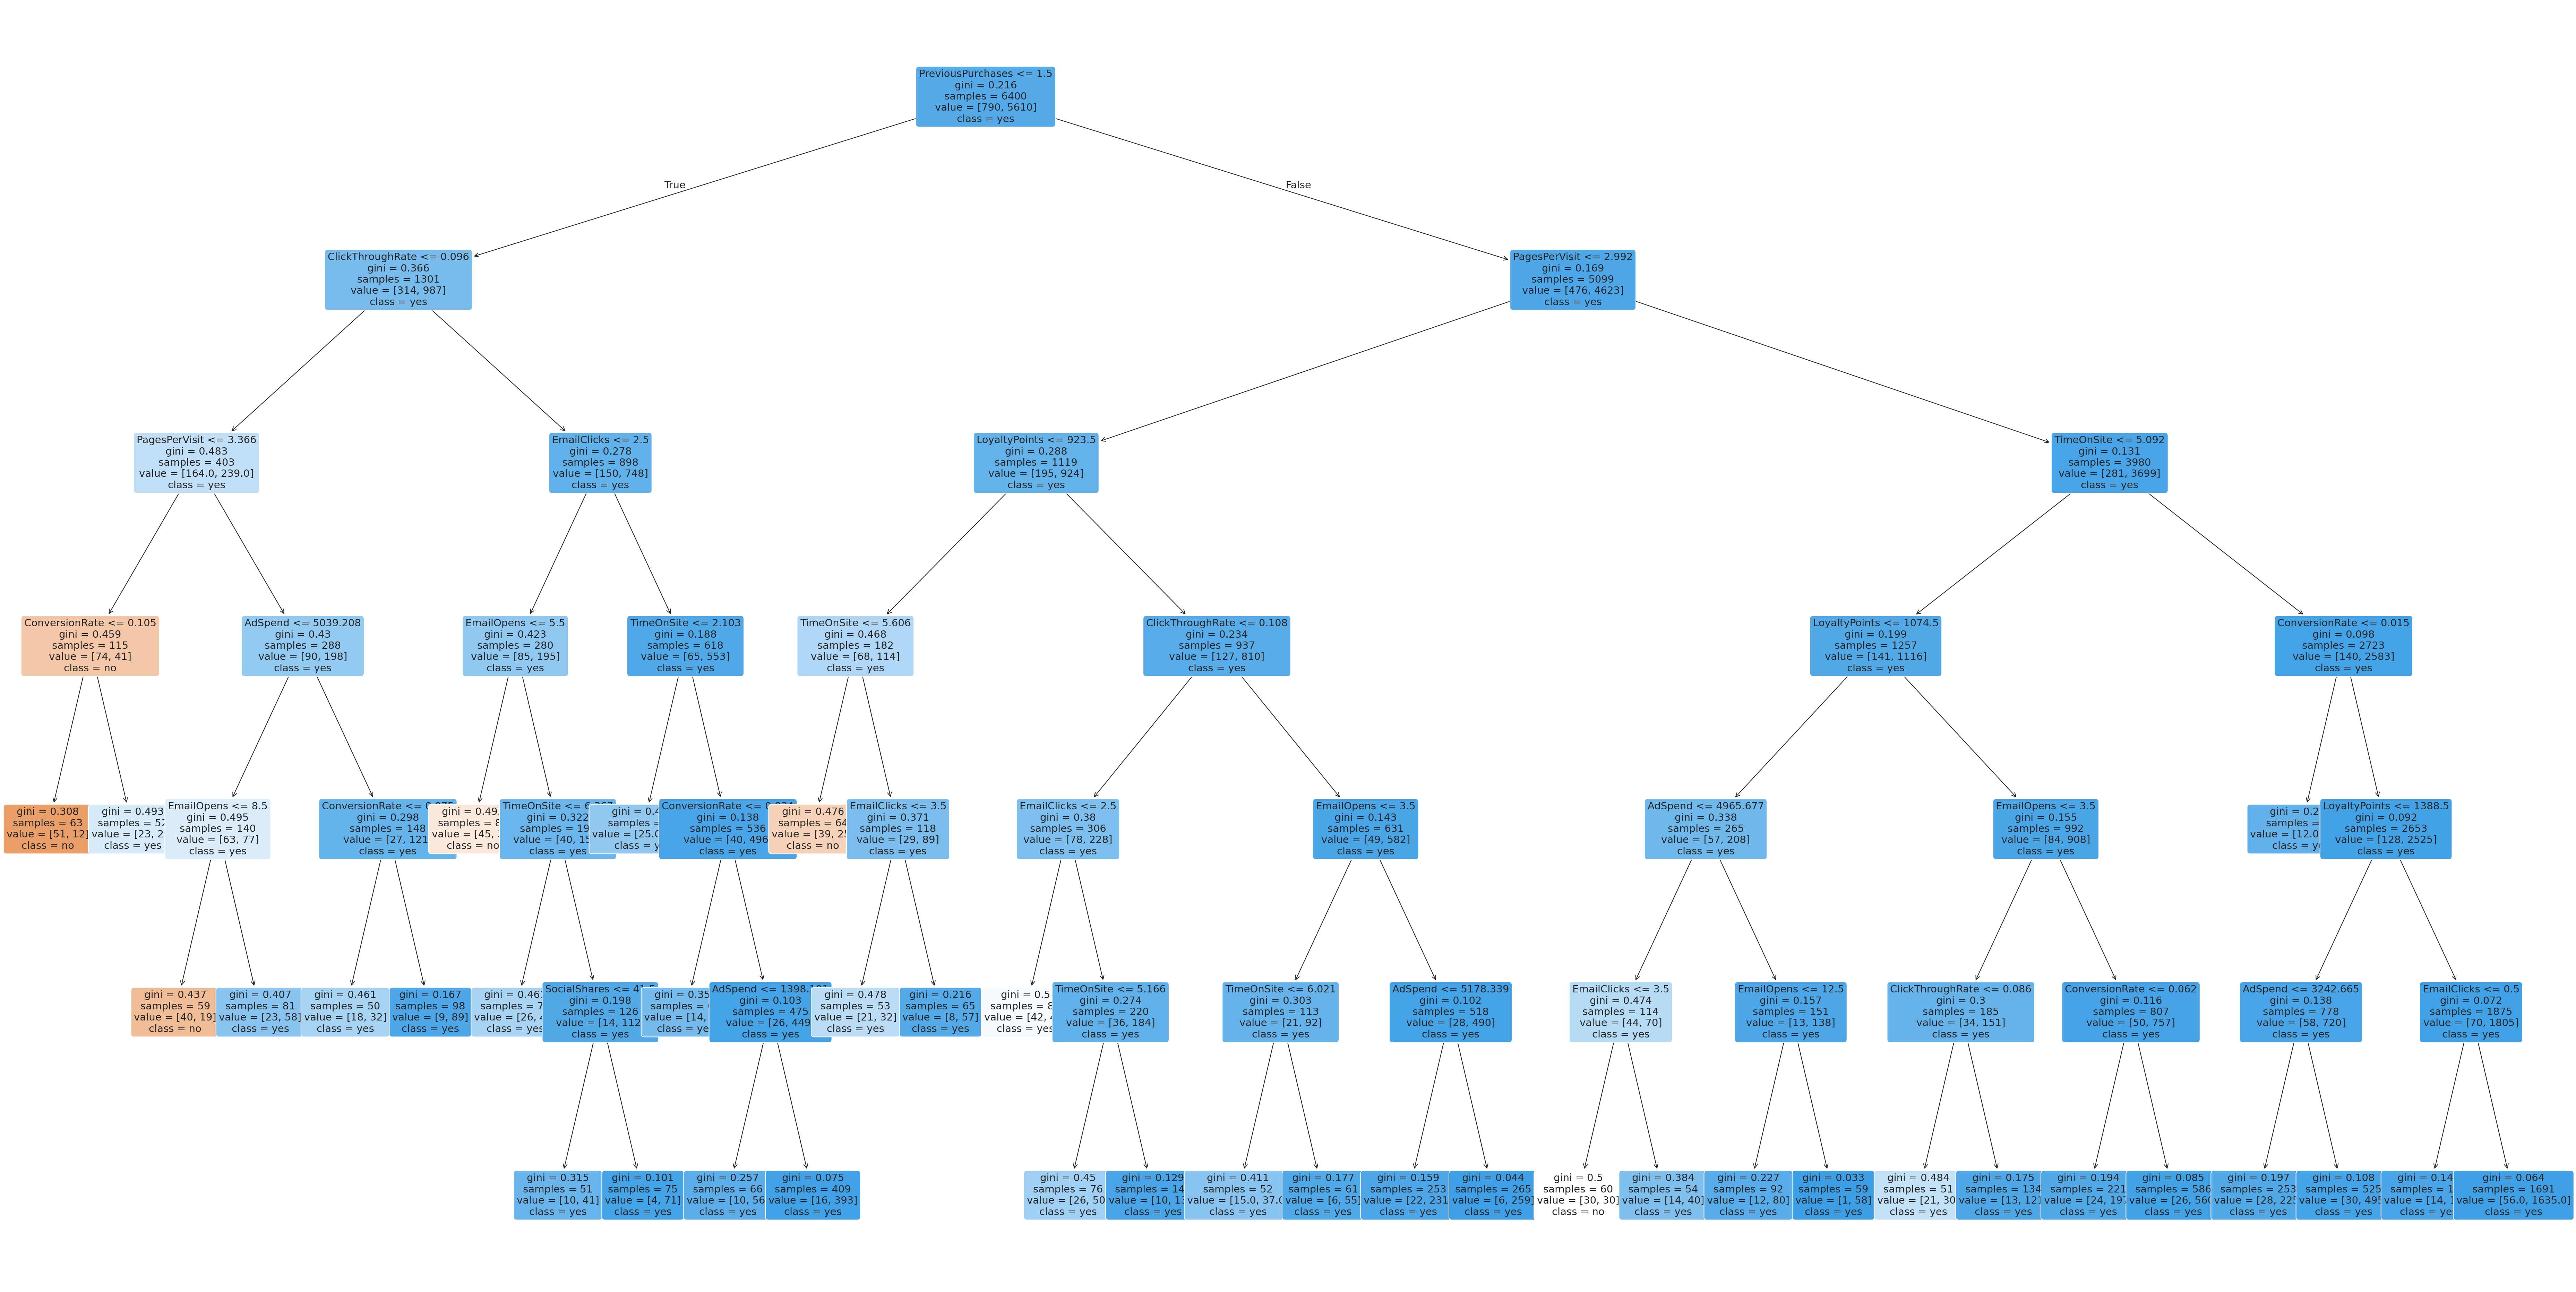

In [94]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn import tree

dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, random_state=42)
dt.fit(X_train, y_train)

# avaliação básica
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

#
rules = export_text(dt, feature_names=list(X_train.columns))
print(rules)

#
plt.figure(figsize=(50, 25), dpi=150)
tree.plot_tree(
    sur,
    feature_names=X_train.columns,
    class_names=['no','yes'],
    filled=True,
    rounded=True,
    fontsize=14
)
plt.tight_layout()
plt.savefig("surrogate_tree_hd.png", dpi=300)
plt.show()



Surrogate accuracy vs ensemble on train: 0.889375
Surrogate -> performance on real y (test):
              precision    recall  f1-score   support

           0       0.52      0.22      0.31       198
           1       0.90      0.97      0.93      1402

    accuracy                           0.88      1600
   macro avg       0.71      0.59      0.62      1600
weighted avg       0.85      0.88      0.86      1600

|--- PreviousPurchases <= 1.50
|   |--- ClickThroughRate <= 0.10
|   |   |--- PagesPerVisit <= 3.37
|   |   |   |--- ConversionRate <= 0.11
|   |   |   |   |--- class: 0
|   |   |   |--- ConversionRate >  0.11
|   |   |   |   |--- class: 1
|   |   |--- PagesPerVisit >  3.37
|   |   |   |--- AdSpend <= 5039.21
|   |   |   |   |--- EmailOpens <= 8.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- EmailOpens >  8.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- AdSpend >  5039.21
|   |   |   |   |--- ConversionRate <= 0.08
|   |   |   |   |   |--- class: 1
|   |  

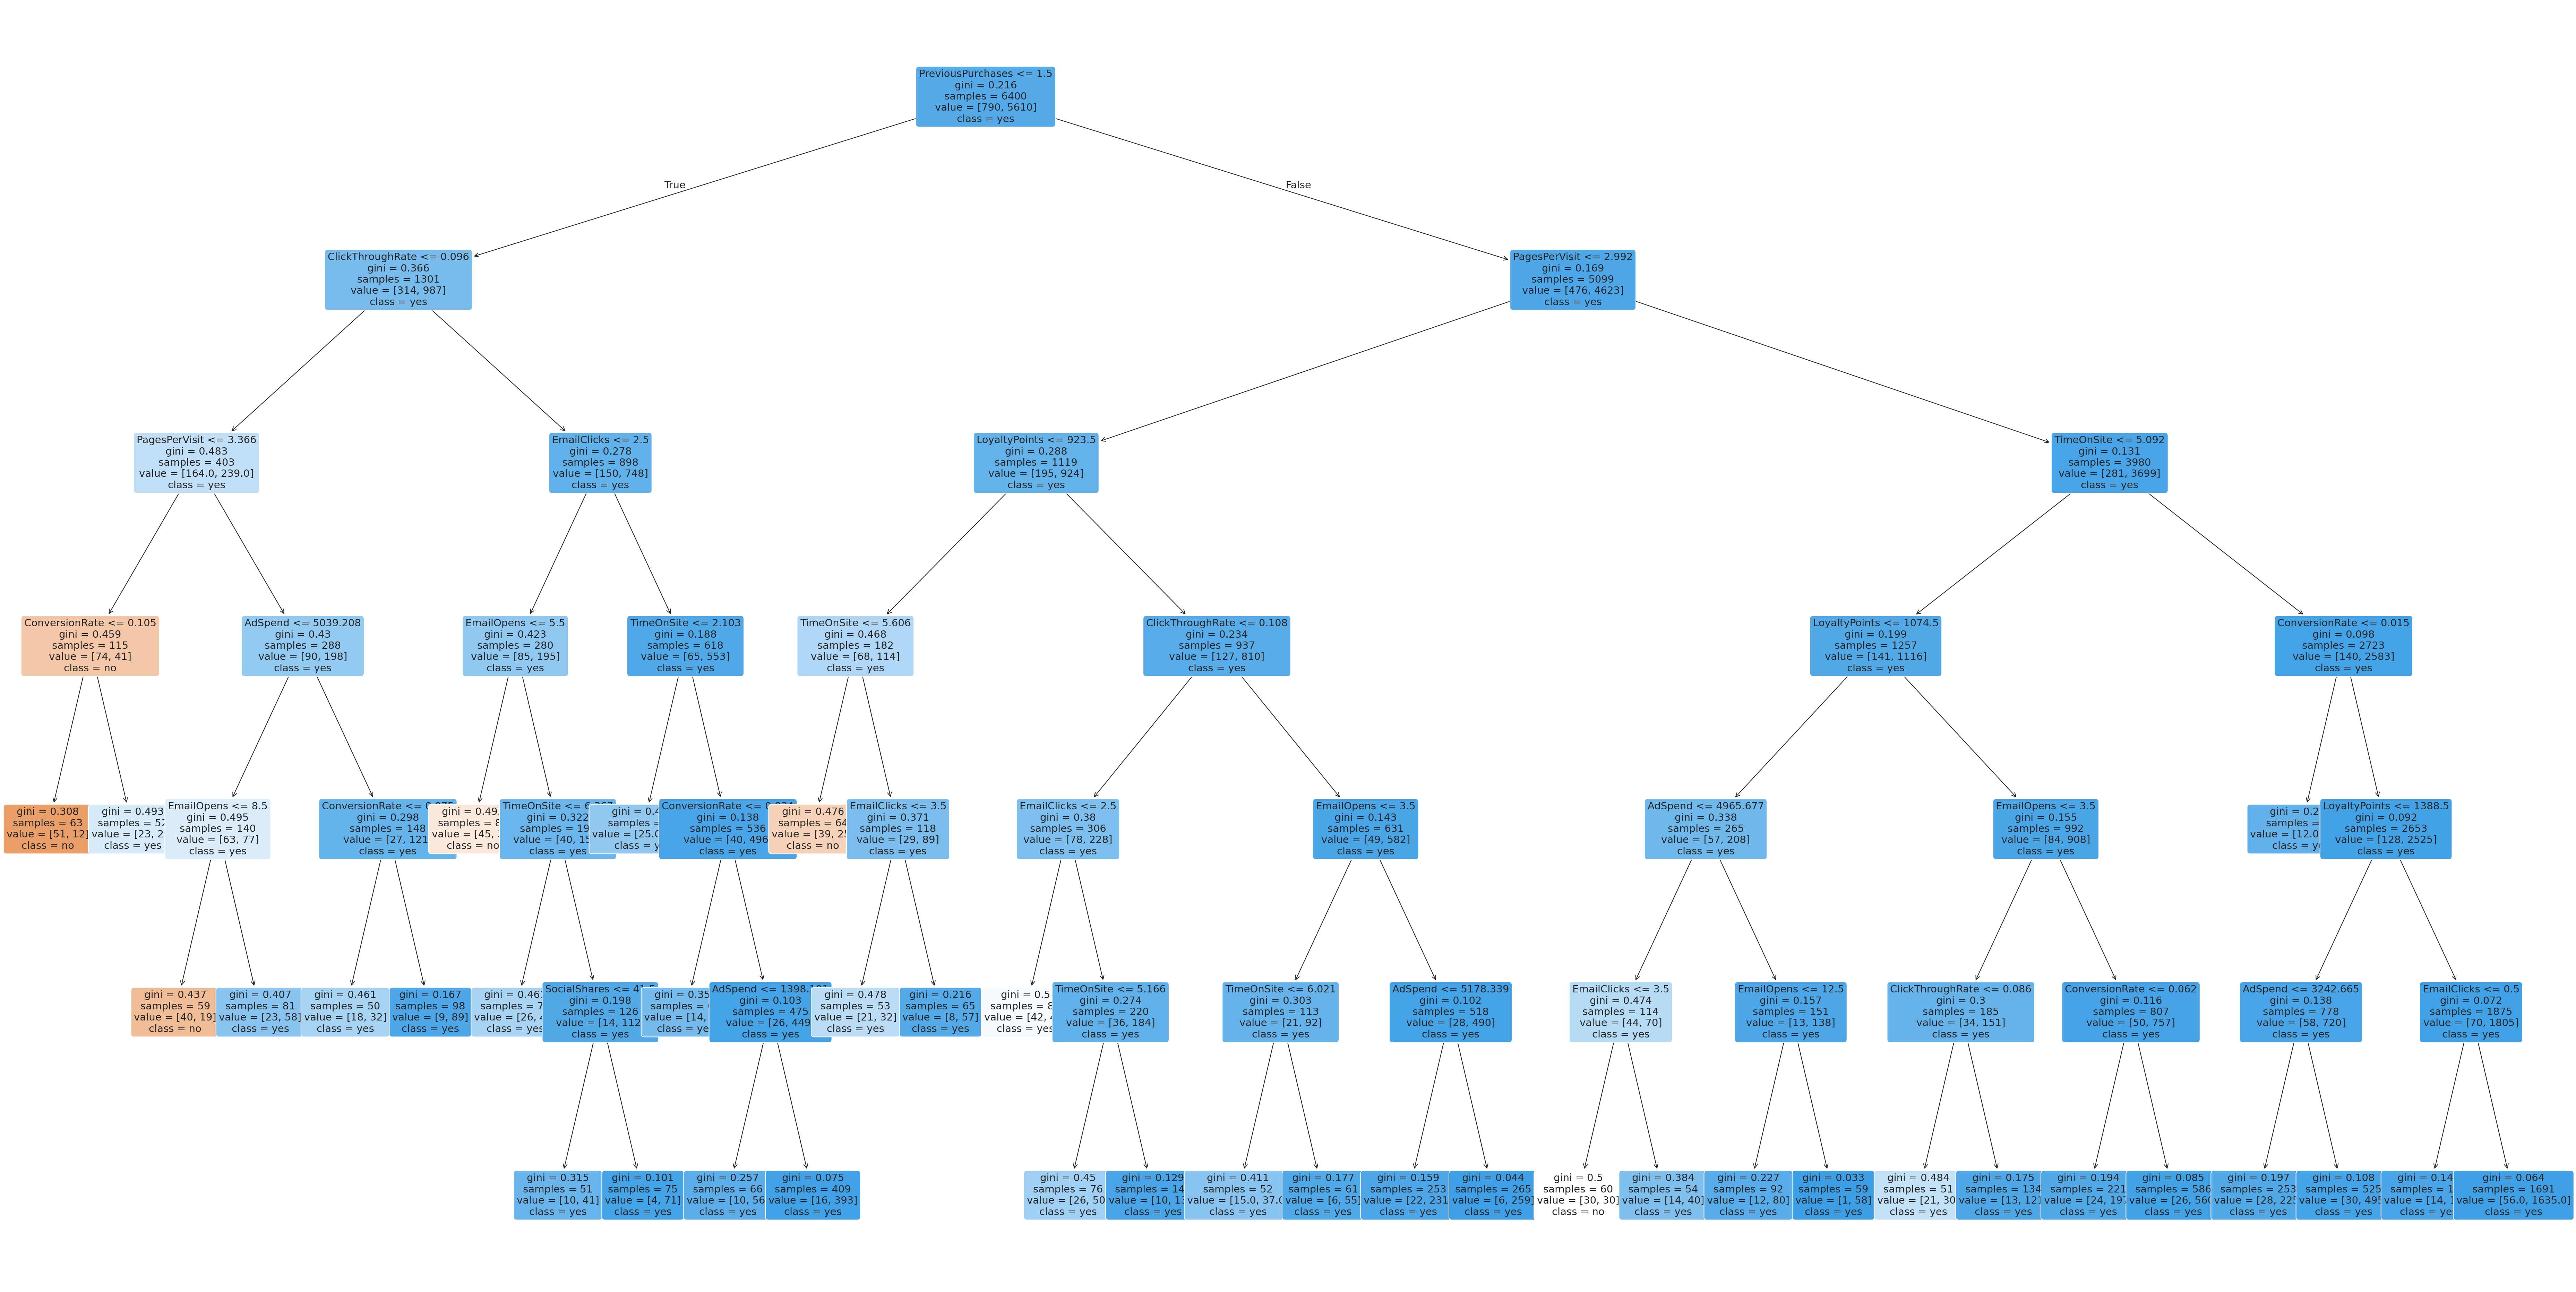

In [95]:
# assume: model = seu XGBoost já treinado; X_train, X_test existem
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, f1_score

# 1) gerar "rótulos" alvo = previsões do ensemble (prob > 0.5 ou classes)
proba_train = model.predict_proba(X_train)[:,1]
# usar classes preditas como alvo da surrogate (ou usar prob threshold 0.5)
y_surrogate = (proba_train >= 0.5).astype(int)

# 2) treinar surrogate tree para imitar o ensemble
sur = DecisionTreeClassifier(max_depth=6, min_samples_leaf=50, random_state=42)
sur.fit(X_train, y_surrogate)

# 3) avaliar quão bem a surrogate imita o ensemble
pred_sur_on_train = sur.predict(X_train)
pred_ens_on_train = (proba_train >= 0.5).astype(int)
print("Surrogate accuracy vs ensemble on train:", accuracy_score(pred_ens_on_train, pred_sur_on_train))

# 4)
pred_sur_on_test = sur.predict(X_test)
print("Surrogate -> performance on real y (test):")
print(classification_report(y_test, pred_sur_on_test))

# 5)
rules = export_text(sur, feature_names=list(X_train.columns))
print(rules)
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(50, 25), dpi=150)
tree.plot_tree(
    sur,
    feature_names=X_train.columns,
    class_names=['no','yes'],
    filled=True,
    rounded=True,
    fontsize=14
)
plt.tight_layout()
plt.savefig("surrogate_tree_hd.png", dpi=300)
plt.show()



Surrogate fidelity (train) — accuracy vs ensemble: 0.88171875
Surrogate -> performance on real y (test):
              precision    recall  f1-score   support

           0     0.6000    0.0606    0.1101       198
           1     0.8823    0.9943    0.9349      1402

    accuracy                         0.8788      1600
   macro avg     0.7411    0.5274    0.5225      1600
weighted avg     0.8473    0.8788    0.8329      1600

---- Regras (export_text) ----

|--- PreviousPurchases <= 1.50
|   |--- ClickThroughRate <= 0.10
|   |   |--- PagesPerVisit <= 3.37
|   |   |   |--- class: 0
|   |   |--- PagesPerVisit >  3.37
|   |   |   |--- AdSpend <= 5039.21
|   |   |   |   |--- class: 1
|   |   |   |--- AdSpend >  5039.21
|   |   |   |   |--- class: 1
|   |--- ClickThroughRate >  0.10
|   |   |--- EmailClicks <= 2.50
|   |   |   |--- TimeOnSite <= 5.79
|   |   |   |   |--- class: 1
|   |   |   |--- TimeOnSite >  5.79
|   |   |   |   |--- class: 1
|   |   |--- EmailClicks >  2.50
|   |   |  

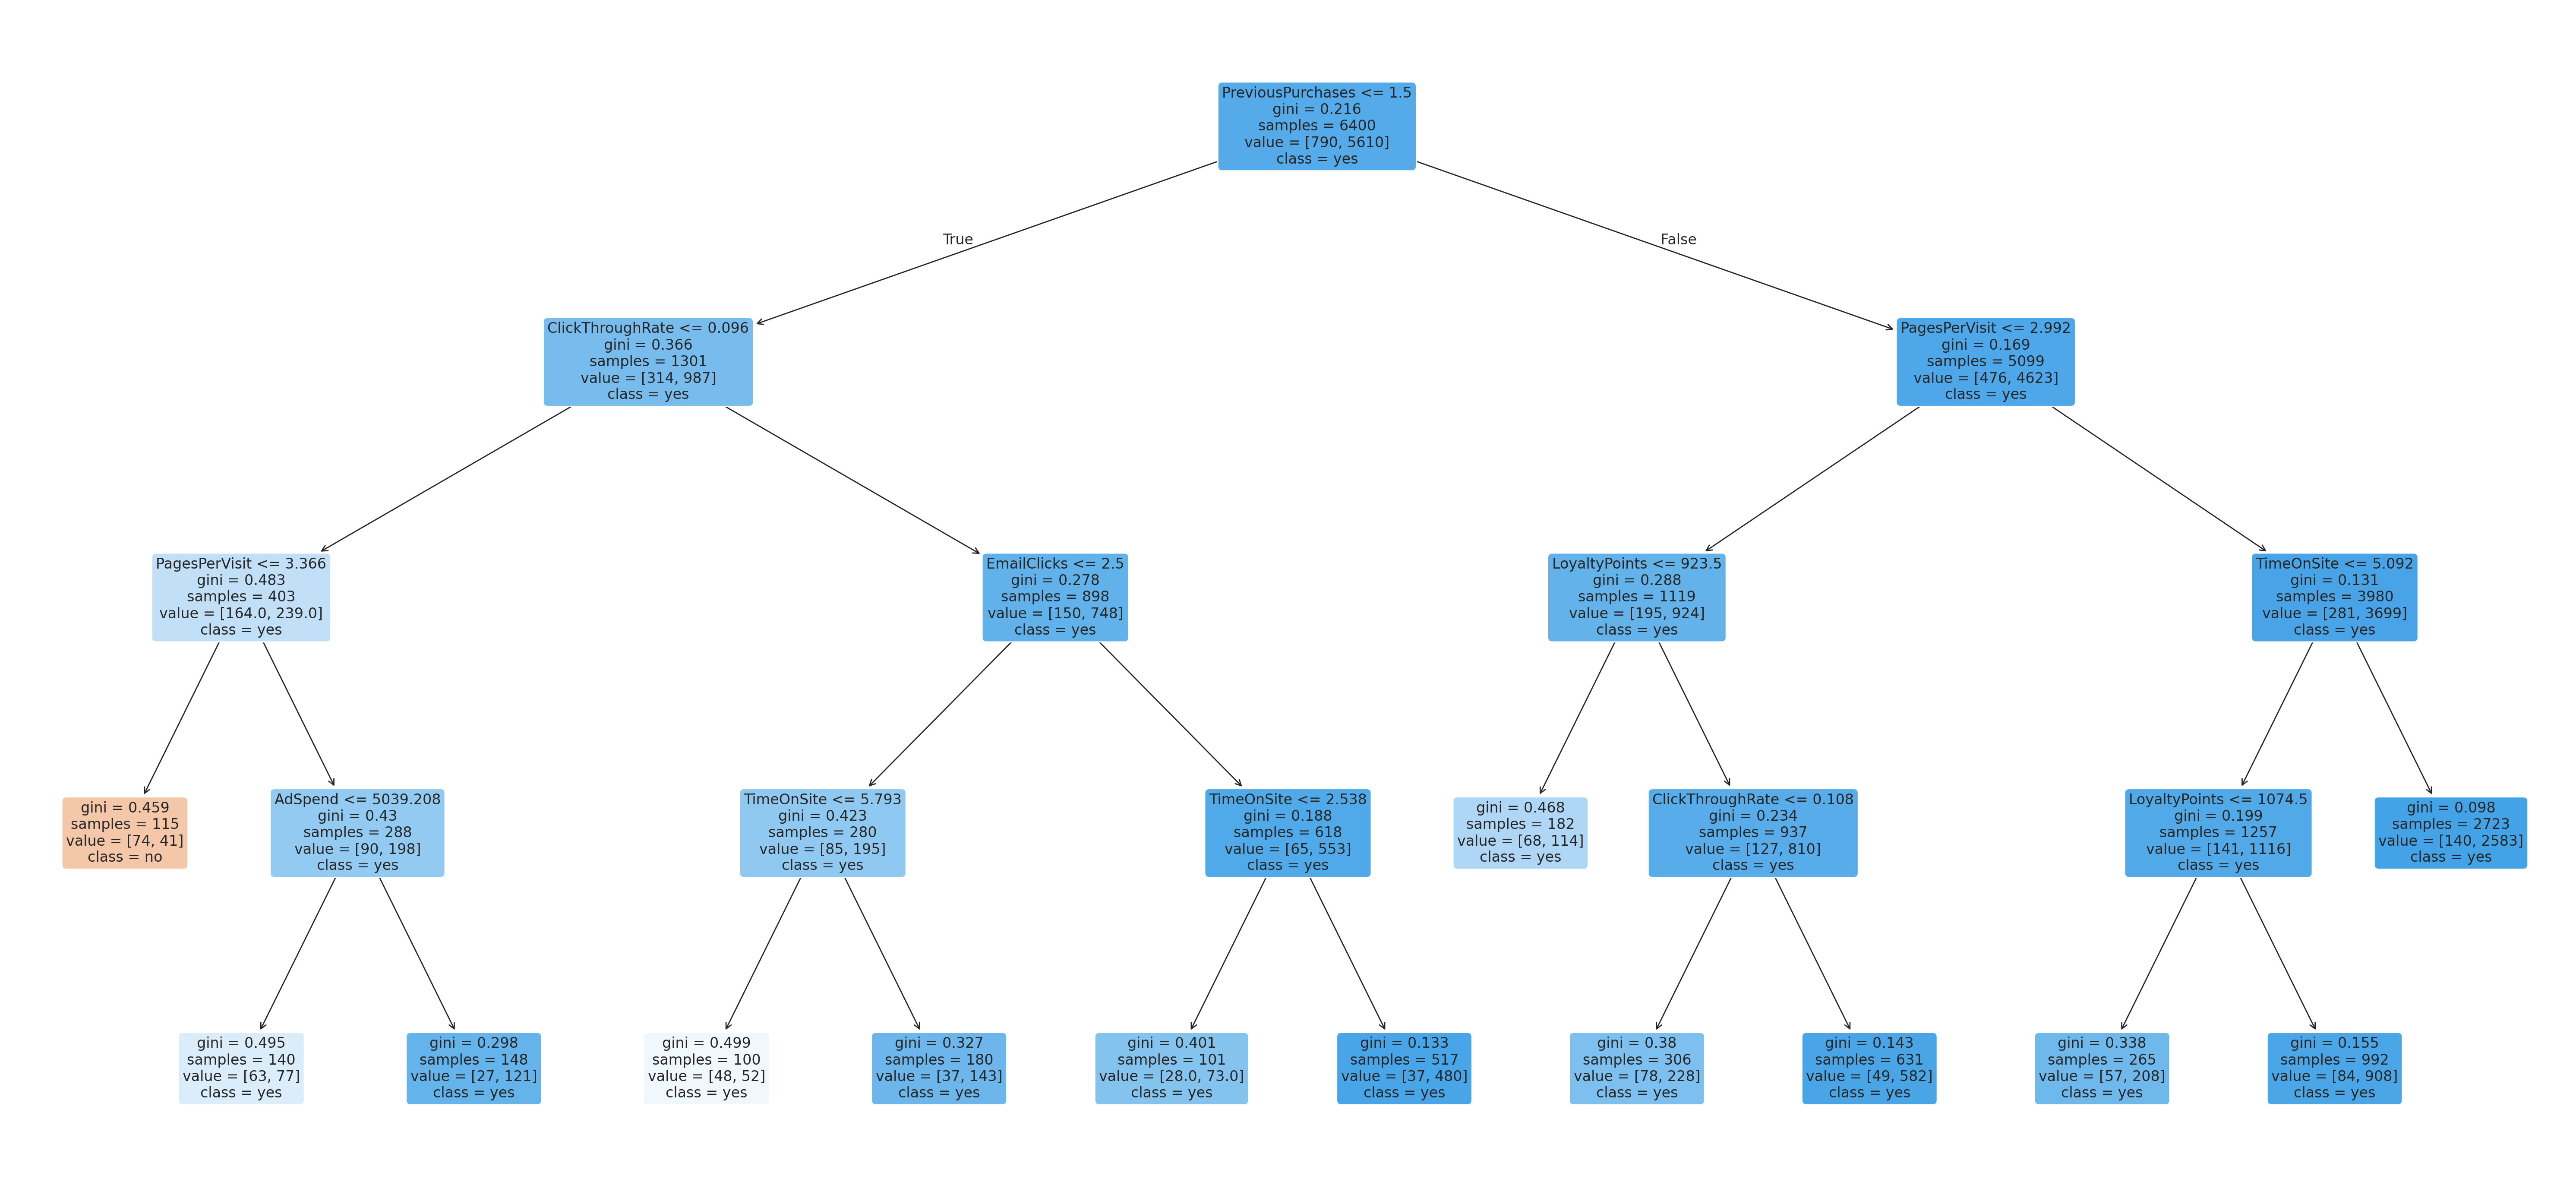

Salvei: surrogate_tree_hd.png e surrogate_tree_hd.pdf


In [96]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

# PARÂMETROS QUE VOCÊ PODE TESTAR (ajuste aqui)
BEST_PARAMS = {
    "max_depth": 4,            # ≤5 para visual limpo
    "min_samples_leaf": 100,   # evita ramos pequenos
    "ccp_alpha": 0.0005,       # 0 = sem poda; aumente se ainda tiver ramos
    # "max_leaf_nodes": 30     # alternativa: limitar número de folhas
}

# 1) Labels do surrogate: prever classes do ensemble no treino
proba_train = model.predict_proba(X_train)[:,1]
y_surrogate = (proba_train >= 0.5).astype(int)

# 2) Treinar surrogate com parâmetros 'pequeninhos'
sur = DecisionTreeClassifier(
    max_depth=BEST_PARAMS["max_depth"],
    min_samples_leaf=BEST_PARAMS["min_samples_leaf"],
    ccp_alpha=BEST_PARAMS["ccp_alpha"],
    random_state=42
)
sur.fit(X_train, y_surrogate)

# 3) Avaliar quão bem surrogata imita o ensemble (na base de treino)
pred_sur_train = sur.predict(X_train)
pred_ens_train = (proba_train >= 0.5).astype(int)
print("Surrogate fidelity (train) — accuracy vs ensemble:", accuracy_score(pred_ens_train, pred_sur_train))

# 4) Avaliar surrogate contra o real y (opcional, pra ver perda de performance)
pred_sur_test = sur.predict(X_test)
print("Surrogate -> performance on real y (test):")
print(classification_report(y_test, pred_sur_test, digits=4))

# 5) Exportar regras legíveis
rules = export_text(sur, feature_names=list(X_train.columns))
print("---- Regras (export_text) ----\n")
print(rules)

# 6) Plot em alta resolução e salvar (PNG e PDF)
plt.figure(figsize=(30, 14), dpi=200)   # grande e com alta dpi
tree.plot_tree(
    sur,
    feature_names=X_train.columns,
    class_names=['no','yes'],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.tight_layout()
plt.savefig("surrogate_tree_hd.png", dpi=300)
plt.savefig("surrogate_tree_hd.pdf")   # vetorial
plt.show()
print("Salvei: surrogate_tree_hd.png e surrogate_tree_hd.pdf")
